<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-и-предобработка-данных" data-toc-modified-id="Обзор-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор и предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Выводы-и-рекомендации:" data-toc-modified-id="Выводы-и-рекомендации:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы и рекомендации:</a></span></li><li><span><a href="#Материалы:" data-toc-modified-id="Материалы:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Материалы:</a></span></li></ul></div>

   # Банки — Анализ оттока клиентов

**Заказчик**: ПАО «Метанпромбанк»

**Цель исследования**:
  
Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.

- Провести исследовательский анализ данных,  
  
- Выделить портреты клиентов, которые склонны уходить из банка,  
  
- Сформулировать и проверить статистические гипотезы.  

**Описание данных:**

Файл `bank_scrooge.csv` - датасет с данными о клиентах банка.  
   	 			 	 	 	 	 	
- `USERID` - идентификатор пользователя,
- `score` - баллы кредитного скоринга,
- `city` - город,
- `gender` - пол,
- `age` - возраст,
- `equity` - приблизительная оценка собственности клиента,
- `balance`- баланс на счёте,
- `products` - количество продуктов, которыми пользуется клиент,
- `credit_card` - есть ли кредитная карта,
- `last_activity` - был ли клиент активен в последнее время,
- `EST_SALARY` - оценочная заработная плата клиента
- `churn` - уходит клиент или нет

**План исследования:**

1) <u>Обзор и предобработка данных.</u>

О качестве исходных данных ничего не известно, поэтому перед работой с ними и проверкой гипотез проведём обзор и предобработку- удалим найденные дубликаты, оценим имеющиеся пропуски в данных и возможность их заполнения, устраним несоответствие типов данных, приведем наименование колонок к единому стилю.

2) <u>Исследовательский анализ данных (EDA)  </u>

На данном этапе мы исследуем и анализируем распределения признаков и их влияние на отток клиентов. Построим столбчатые диаграммы для категориальных признаков и гистограммы распределения для числовых признаков, а так же диаграммы размаха, чтобы обратить внимание на наличие выбросов.

Далее построим матрицу корреляции, чтобы выявить признаки мультиколлениарности.

Проведем сегментацию клиентов по степени оттока: исследуем взаимосвязь признаков и оттока клиентов.  

Сделаем и опишем промежуточные выводы.  


3) <u>Проверка гипотез </u>

Проверим 2 гипотезы, сформулируем нулевые и альтернативные гипотезы:  
- Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.
    
- Проверим гипотезу о различии в скоринговых баллах действующих и ушедших клиентов банка.

    
4) <u>Выводы и рекомендации </u> 

По результатам анализа выявляем признаки, наиболее влияющие на отток и даем рекомендации, в том числе, в разрезе портретов пользователей.

5) <u>Материалы (Ссылки на дашборд и презентацию).</u>

## Обзор и предобработка данных

In [3]:
# импортируем необходимые библиотеки

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings; warnings.filterwarnings(action = 'ignore')
from IPython.display import set_matplotlib_formats
from scipy import stats as st
# !pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [4]:
# снимем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

# снимем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

# игнорируем предупреждения
pd.set_option('chained_assignment', None)  

# выставляем ограничение на показ знаков после запятой
pd.set_option('display.float_format', '{:.2f}'.format)

# задаем размер графика
sns.set(rc={'figure.figsize':(12,5)})

# устанавливаем стиль графиков
sns.set(rc={'figure.dpi':200, 'savefig.dpi':300})
sns.set_style('whitegrid')
sns.set_style('ticks')
sns.set_context('notebook')

In [5]:
# прочитаем файл с данными и сохраним в датафрейм

path = "https://drive.google.com/********************"
data = pd.read_csv(path)

In [6]:
# выведем несколько строк нашего датафрейма

data.head()

USERID  score       city gender   age  equity    balance  products  \
0  183012 850.00    Рыбинск      Ж 25.00       1   59214.82         2   
1  146556 861.00    Рыбинск      Ж 37.00       5  850594.33         3   
2  120722 892.00    Рыбинск      Ж 30.00       0        NaN         1   
3  225363 866.00  Ярославль      Ж 51.00       5 1524746.26         2   
4  157978 730.00  Ярославль      М 34.00       5     174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

Посмотрим общую информацию о данных:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [8]:
data.describe()

USERID    score     age   equity      balance  products  credit_card  \
count  10000.00 10000.00 9974.00 10000.00      7705.00  10000.00     10000.00   
mean  171814.71   848.70   42.73     2.63    827794.31      1.87         0.68   
std    33708.24    65.45   12.18     1.98   1980614.15      0.79         0.47   
min    94561.00   642.00   18.00     0.00         0.00      0.00         0.00   
25%   142810.25   802.00   33.00     0.00    295554.16      1.00         0.00   
50%   172728.00   853.00   40.00     3.00    524272.20      2.00         1.00   
75%   201261.75   900.00   51.00     4.00    980705.85      2.00         1.00   
max   229145.00  1000.00   86.00     9.00 119113552.01      5.00         1.00   

       last_activity  EST_SALARY    churn  
count       10000.00    10000.00 10000.00  
mean            0.52   147866.89     0.18  
std             0.50   139388.51     0.39  
min             0.00     2546.30     0.00  
25%             0.00    75251.90     0.00  
50%             1.00   119658.10     0.00  
75%             1.00   174500.54     0.00  
max             1.00  1395064.45     1.00

<div class="alert alert-success">
<b>👍 Успех:</b> Есть описание задачи, план реализации проекта, импортированы нужные библиотеки, датасет загружен и просмотрен
</div>

In [9]:
# проверим на явные дубликаты

display(data.duplicated().sum())

0

In [10]:
# переименуем названия двух столбцов в более удобные для восприятия:

data = data.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'})
data.head()

user_id  score       city gender   age  equity    balance  products  \
0   183012 850.00    Рыбинск      Ж 25.00       1   59214.82         2   
1   146556 861.00    Рыбинск      Ж 37.00       5  850594.33         3   
2   120722 892.00    Рыбинск      Ж 30.00       0        NaN         1   
3   225363 866.00  Ярославль      Ж 51.00       5 1524746.26         2   
4   157978 730.00  Ярославль      М 34.00       5     174.00         1   

   credit_card  last_activity  est_salary  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

Посмотрим какие города представлены в датасете:

In [11]:
data['city'].value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

Посмотрим какие оценки собственности получили клиенты банка:

In [12]:
data['equity'].value_counts()

0    2592
5    1918
4    1850
3    1543
2    1052
1     774
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

Посмотрим сколько продуктов банка имеют клиенты:

In [13]:
data['products'].value_counts()

2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64

Выведем несколько строк датафрейма, где в колонке "balance" пропущены значения:

In [14]:
data_no_balances = data[data['balance'].isna()]
data_no_balances.head(11)

user_id  score       city gender   age  equity  balance  products  \
2    120722 892.00    Рыбинск      Ж 30.00       0      NaN         1   
9    133130 906.00  Ярославль      Ж 67.00       0      NaN         1   
10   148929 927.00     Ростов      М 52.00       0      NaN         1   
11   172184 921.00     Ростов      М 41.00       0      NaN         1   
19   127034 922.00    Рыбинск      Ж 53.00       0      NaN         1   
21   177415 896.00    Рыбинск      Ж 47.00       0      NaN         1   
30   155730 946.00  Ярославль      Ж 47.00       0      NaN         2   
34   205226 944.00  Ярославль      М 35.00       0      NaN         2   
39   173175 924.00    Рыбинск      Ж 51.00       0      NaN         1   
43   228585 956.00     Ростов      М 41.00       0      NaN         1   
46   118927 921.00  Ярославль      Ж 72.00       1      NaN         1   

    credit_card  last_activity  est_salary  churn  
2             1              1   107683.34      0  
9             0              1   238055.53      0  
10            1              1   196820.07      0  
11            1              1   217469.48      0  
19            0              0   147094.82      0  
21            0              0   225060.35      0  
30            1              1   660015.85      0  
34            1              1   239843.39      0  
39            1              1   248844.47      0  
43            1              0   115117.10      0  
46            1              0   253494.70      0

Попытаемся понять, почему нет данных про баланс на счете.

In [15]:
data_no_balances.describe()

user_id   score     age  equity  balance  products  credit_card  \
count   2295.00 2295.00 2279.00 2295.00     0.00   2295.00      2295.00   
mean  172069.45  865.35   42.09    0.05      NaN      1.16         0.82   
std    33337.08   89.60   11.94    0.23      NaN      0.40         0.39   
min   114182.00  642.00   18.00    0.00      NaN      0.00         0.00   
25%   143095.50  871.00   33.00    0.00      NaN      1.00         1.00   
50%   172659.00  903.00   40.00    0.00      NaN      1.00         1.00   
75%   201551.00  922.00   49.00    0.00      NaN      1.00         1.00   
max   229145.00  990.00   86.00    3.00      NaN      3.00         1.00   

       last_activity  est_salary   churn  
count        2295.00     2295.00 2295.00  
mean            0.55   226310.21    0.01  
std             0.50   199771.79    0.08  
min             0.00    20274.03    0.00  
25%             0.00   120347.70    0.00  
50%             1.00   174160.68    0.00  
75%             1.00   240014.99    0.00  
max             1.00  1333687.36    1.00

In [16]:
len(data_no_balances.query('churn==1'))

13

Из 2295 клиентов, по которым нет значений баланса, только 13 перестали быть клиентами банка (стали отточными).  
Поэтому пропуски в балансе не связаны с тем, что клиент отточный и его последний баланс не подтянулся.

In [17]:
# посмотрим сколько продуктов банка имеют клиенты с пропусками в балансе

data_no_balances['products'].value_counts()

1    1950
2     315
3      29
0       1
Name: products, dtype: int64

In [18]:
# посмотрим долю клиентов с пропусками в балансе, которые имеют кредитную карту

data_no_balances['credit_card'].mean()

0.8156862745098039

Похоже, что пропуски в балансе имеют клиенты банка, имеющие ипотечный и/или другой кредиты и просто погашающие ежемесячно свою задолженность, но не имеющие при этом дебетового счёта и, соответсвенно, баланса на нём.

Так как пропусков в балансе 23% от всего датафрейма, то удалять эти строки нельзя, заполним пропуски нулями:

In [19]:
data['balance'] = data['balance'].fillna(0)

In [20]:
data['balance'].isna().sum()

0

Пропусков в колонке "age" всего 26 штук (0.26% от всего датафрейма), и так как их не можем заполнить корректно, то удалим:

In [21]:
data = data.dropna(subset=['age'])

In [22]:
data['age'].isna().sum()

0

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [23]:
# проверим на явные дубликаты колонку user_id

display(data['user_id'].duplicated().sum())

50

Посмотрим, по каким признакам отличаются эти 50 дубликатов user_id:

In [24]:
data[data['user_id'].duplicated(keep=False)].sort_values(by='user_id').head(10)

user_id  score       city gender   age  equity    balance  products  \
1893   116540 883.00    Рыбинск      Ж 55.00       1  362756.49         3   
7694   116540 887.00  Ярославль      Ж 38.00       0       0.00         1   
4866   117943 855.00    Рыбинск      Ж 32.00       6 1036832.93         4   
7542   117943 880.00  Ярославль      Ж 40.00       0       0.00         1   
5863   120258 908.00    Рыбинск      Ж 38.00       4 2213581.63         2   
5896   120258 905.00  Ярославль      М 30.00       0       0.00         1   
1411   123461 829.00  Ярославль      Ж 59.00       0   96222.44         2   
8638   123461 934.00    Рыбинск      М 34.00       0       0.00         2   
9775   124450 758.00    Рыбинск      Ж 36.00       0   73574.07         2   
8164   124450 859.00  Ярославль      Ж 38.00       6  516811.20         1   

      credit_card  last_activity  est_salary  churn  
1893            0              1   175920.48      1  
7694            0              1   119247.61      0  
4866            1              1   107792.71      1  
7542            1              0   137718.93      0  
5863            0              1   160327.77      1  
5896            1              1   146427.96      0  
1411            0              1   102771.55      1  
8638            1              0   291619.27      0  
9775            0              1    79963.59      0  
8164            1              1    95144.63      1

По колонкам 'age' и 'gender' видим, что дубликаты в user_id - это разные люди.  
Также видим, что дубли в паре не принадлежат одному городу и один из них является ушедшим.  
Таким образом, похоже на то, что при уходе клиента из банка его user_id могут присвоить в другом городе новому клиенту.  
Ничего с ними делать не будем, т.к. можем их учитывать при исследовании оттока клиентов из банка.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

В столбцах 'score' и 'age' данные хранятся в формате `float`, но при этом значения в этих столбцах целочисленные, поэтому преобразуем их в тип `int`.  

А в столбцах 'balance' и 'est_salary' данные хранятся в формате `float`, но так как нам не нужна точность до копеек, то также преобразуем их в тип `int`.

In [25]:
data[['score','age','balance','est_salary']] = data[['score','age','balance','est_salary']].astype(int)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        9974 non-null   int64 
 1   score          9974 non-null   int64 
 2   city           9974 non-null   object
 3   gender         9974 non-null   object
 4   age            9974 non-null   int64 
 5   equity         9974 non-null   int64 
 6   balance        9974 non-null   int64 
 7   products       9974 non-null   int64 
 8   credit_card    9974 non-null   int64 
 9   last_activity  9974 non-null   int64 
 10  est_salary     9974 non-null   int64 
 11  churn          9974 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 1013.0+ KB


Построим точечный **график клиентских балансов**, чтобы проверить на аномалии. 

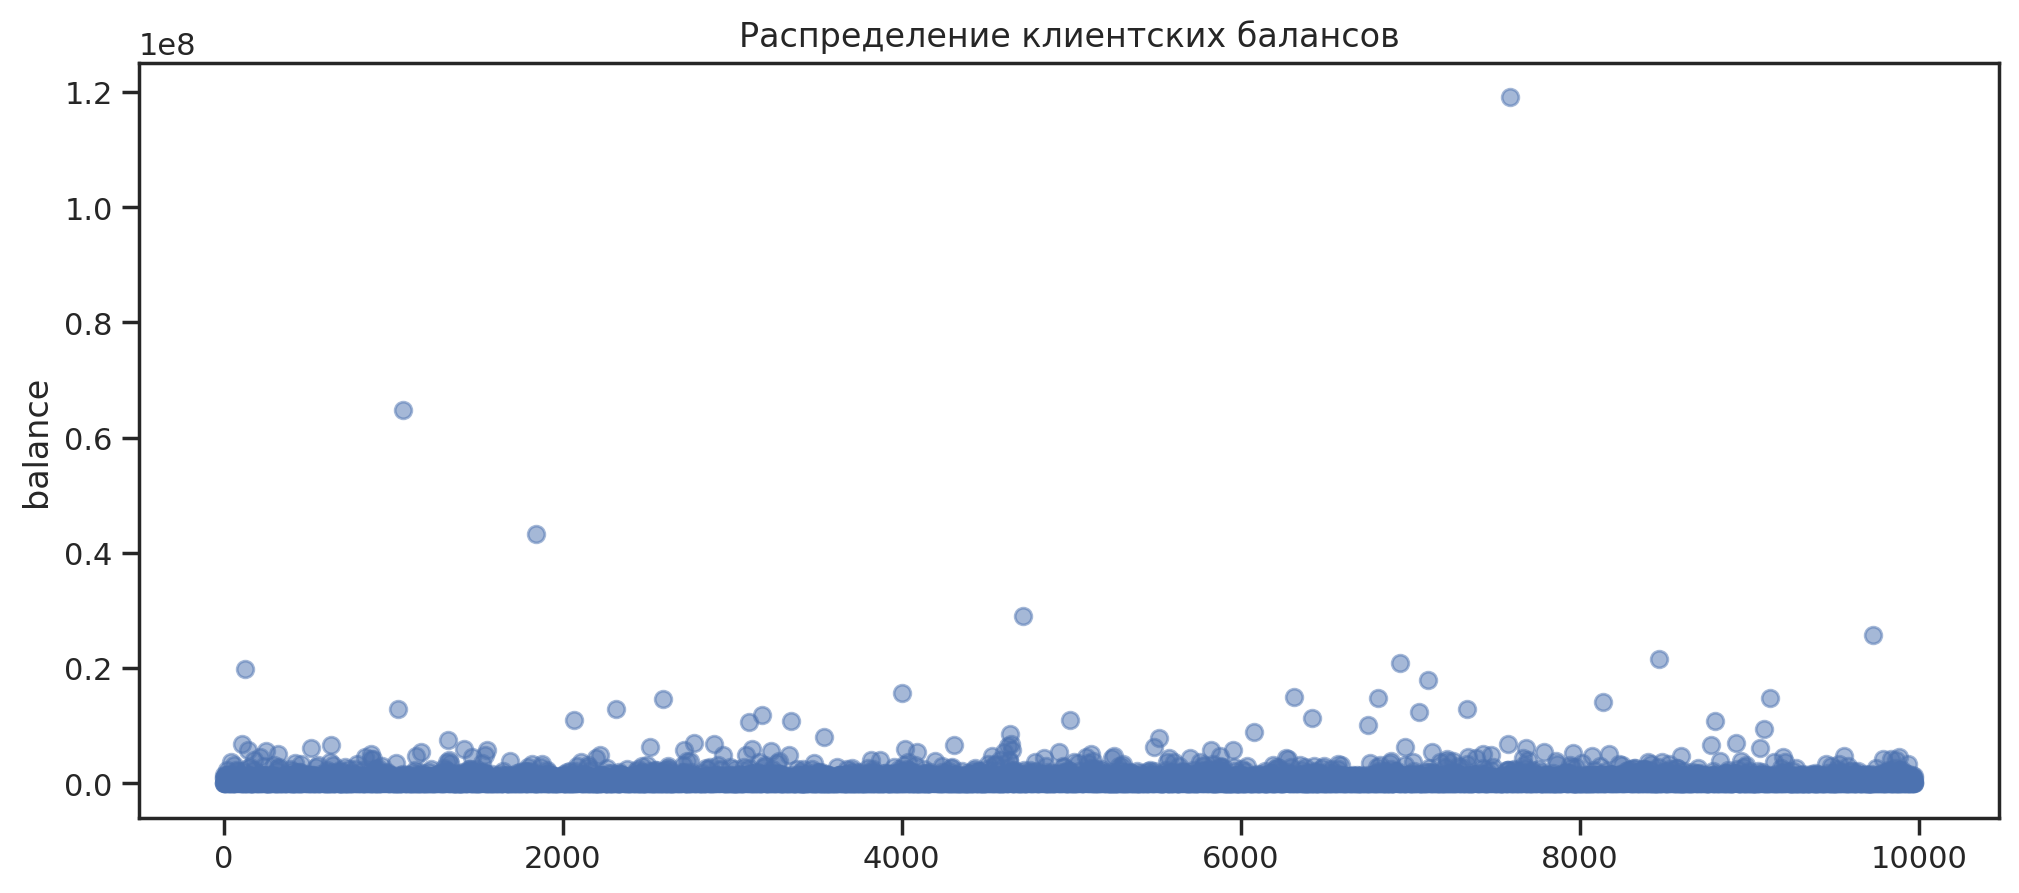

In [27]:
x_values = pd.Series(range(0,len(data['balance'])))

# строим точечный график
plt.scatter(x_values, data['balance'], alpha=0.5)
plt.ylabel('balance')
plt.title('Распределение клиентских балансов');

Мы видим несколько сильно выбивающихся балансов (на уровне выше 10 млн), а также другие весомые балансы, которые могут повлиять на результат исследований.

Построим аналогичный график без этих крупных выбросов, ограничив масштаб по оси "y".

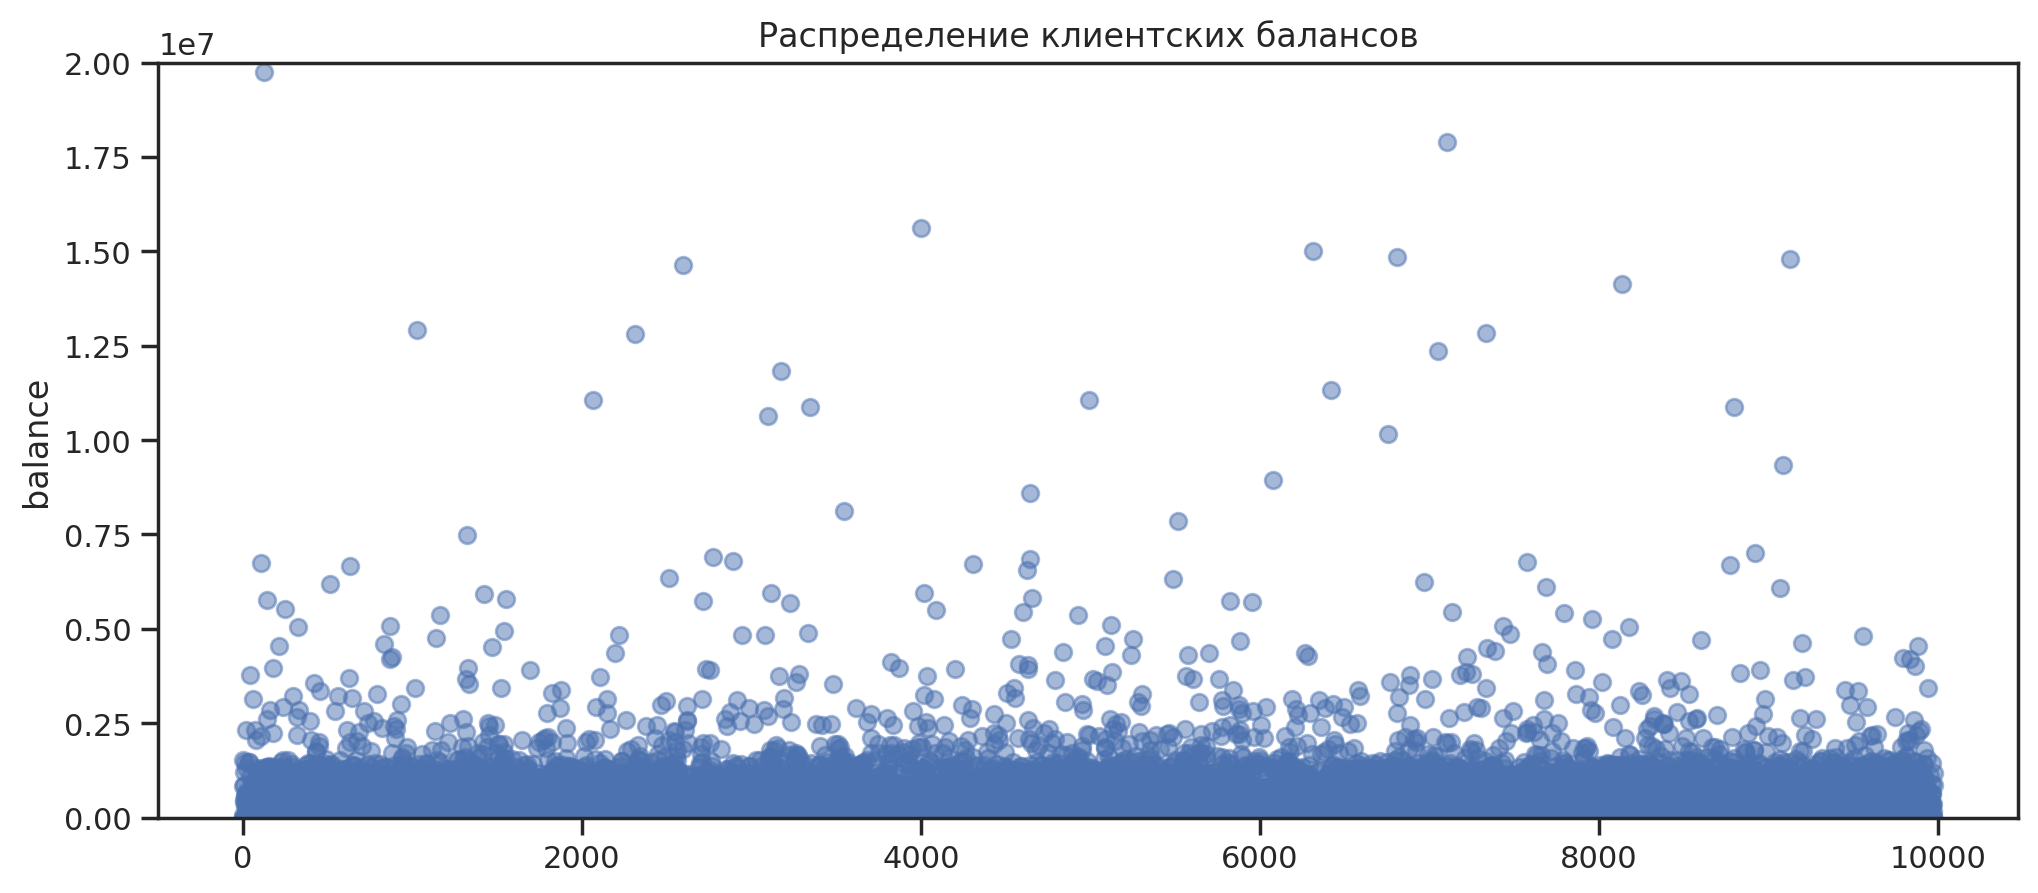

In [28]:
plt.ylim(0, 20000000)
plt.scatter(x_values, data['balance'], alpha=0.5)
plt.ylabel('balance')
plt.title('Распределение клиентских балансов');

Мы видим, что основная масса балансов не превышает 5 млн.

Посчитаем 95-й и 99-й перцентили клиентских балансов:

In [29]:
np.percentile(data['balance'], [95, 99])

array([1839744.4       , 4295524.87000001])

Установим границу для определения аномалий в балансах на величине 99-го перцентиля = 4 295 525.

Построим точечный **график оценочных заработных плат клиентов**, чтобы проверить на аномалии

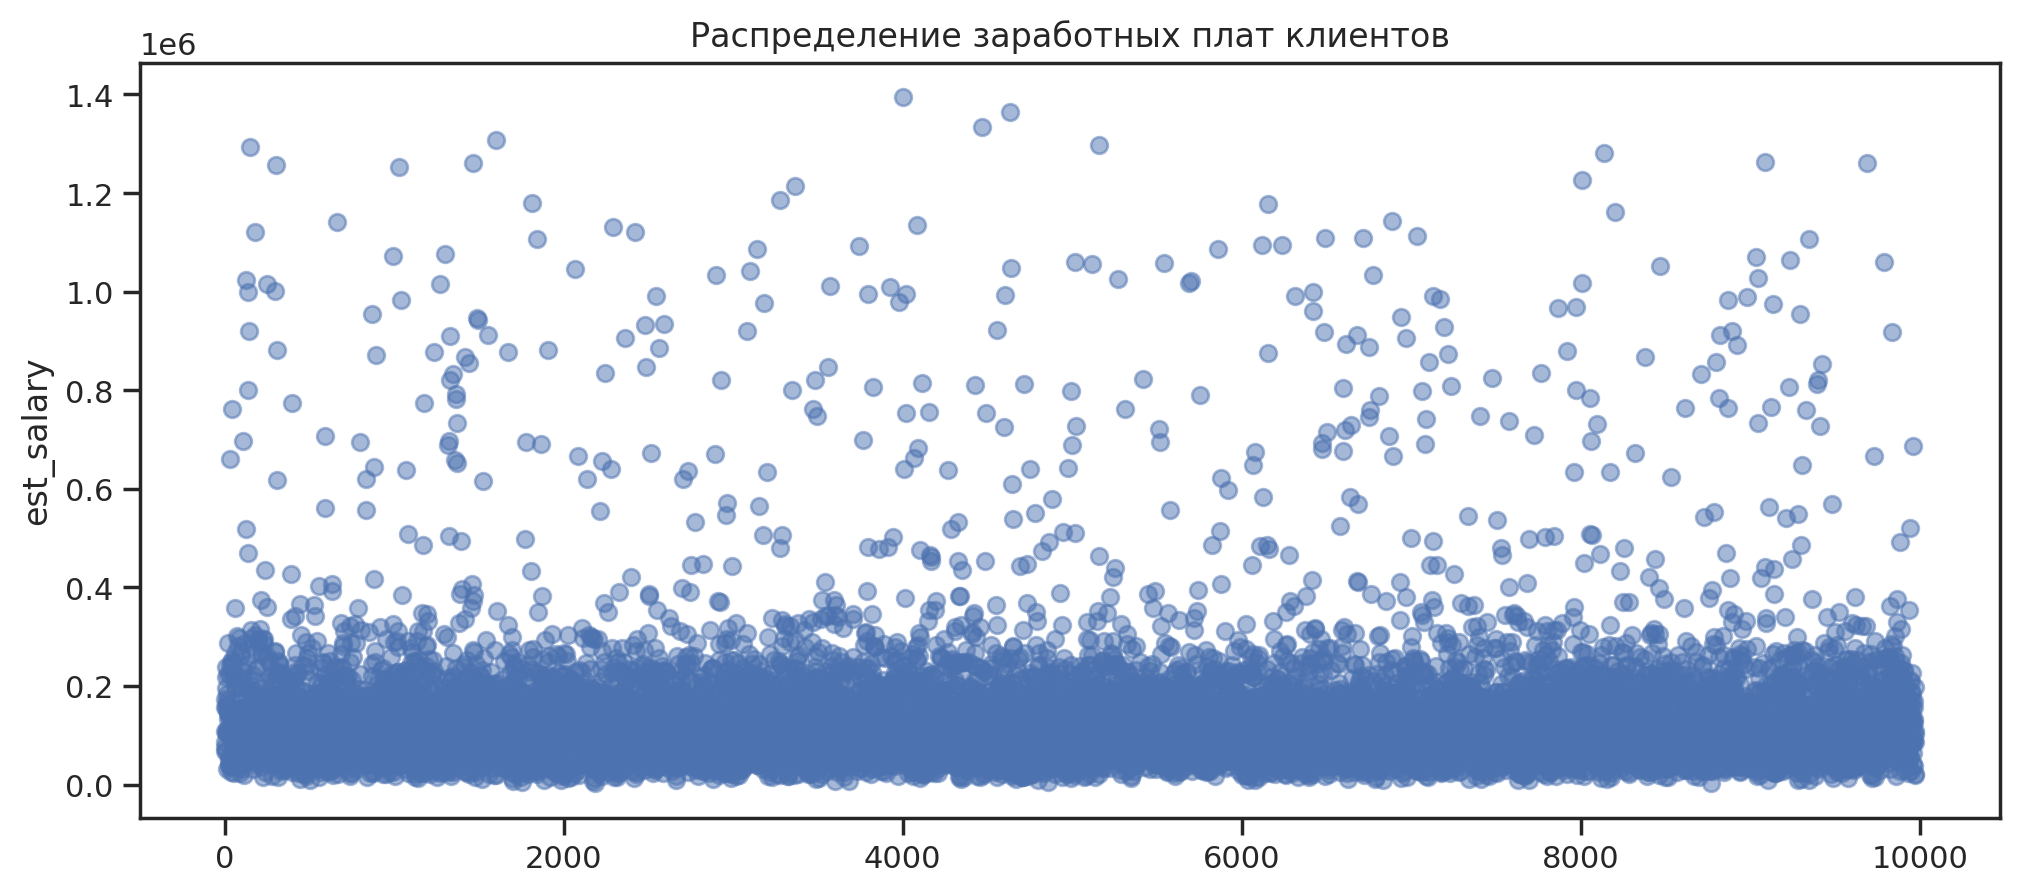

In [30]:
x_values = pd.Series(range(0,len(data['est_salary'])))

# строим точечный график
plt.scatter(x_values, data['est_salary'], alpha=0.5)
plt.ylabel('est_salary')
plt.title('Распределение заработных плат клиентов');

Мы видим сильно выбивающиеся значения заработных плат (на уровне выше 900 тыс), которые могут повлиять на результат исследований.

Построим аналогичный график без этих крупных выбросов, ограничив масштаб по оси "y".

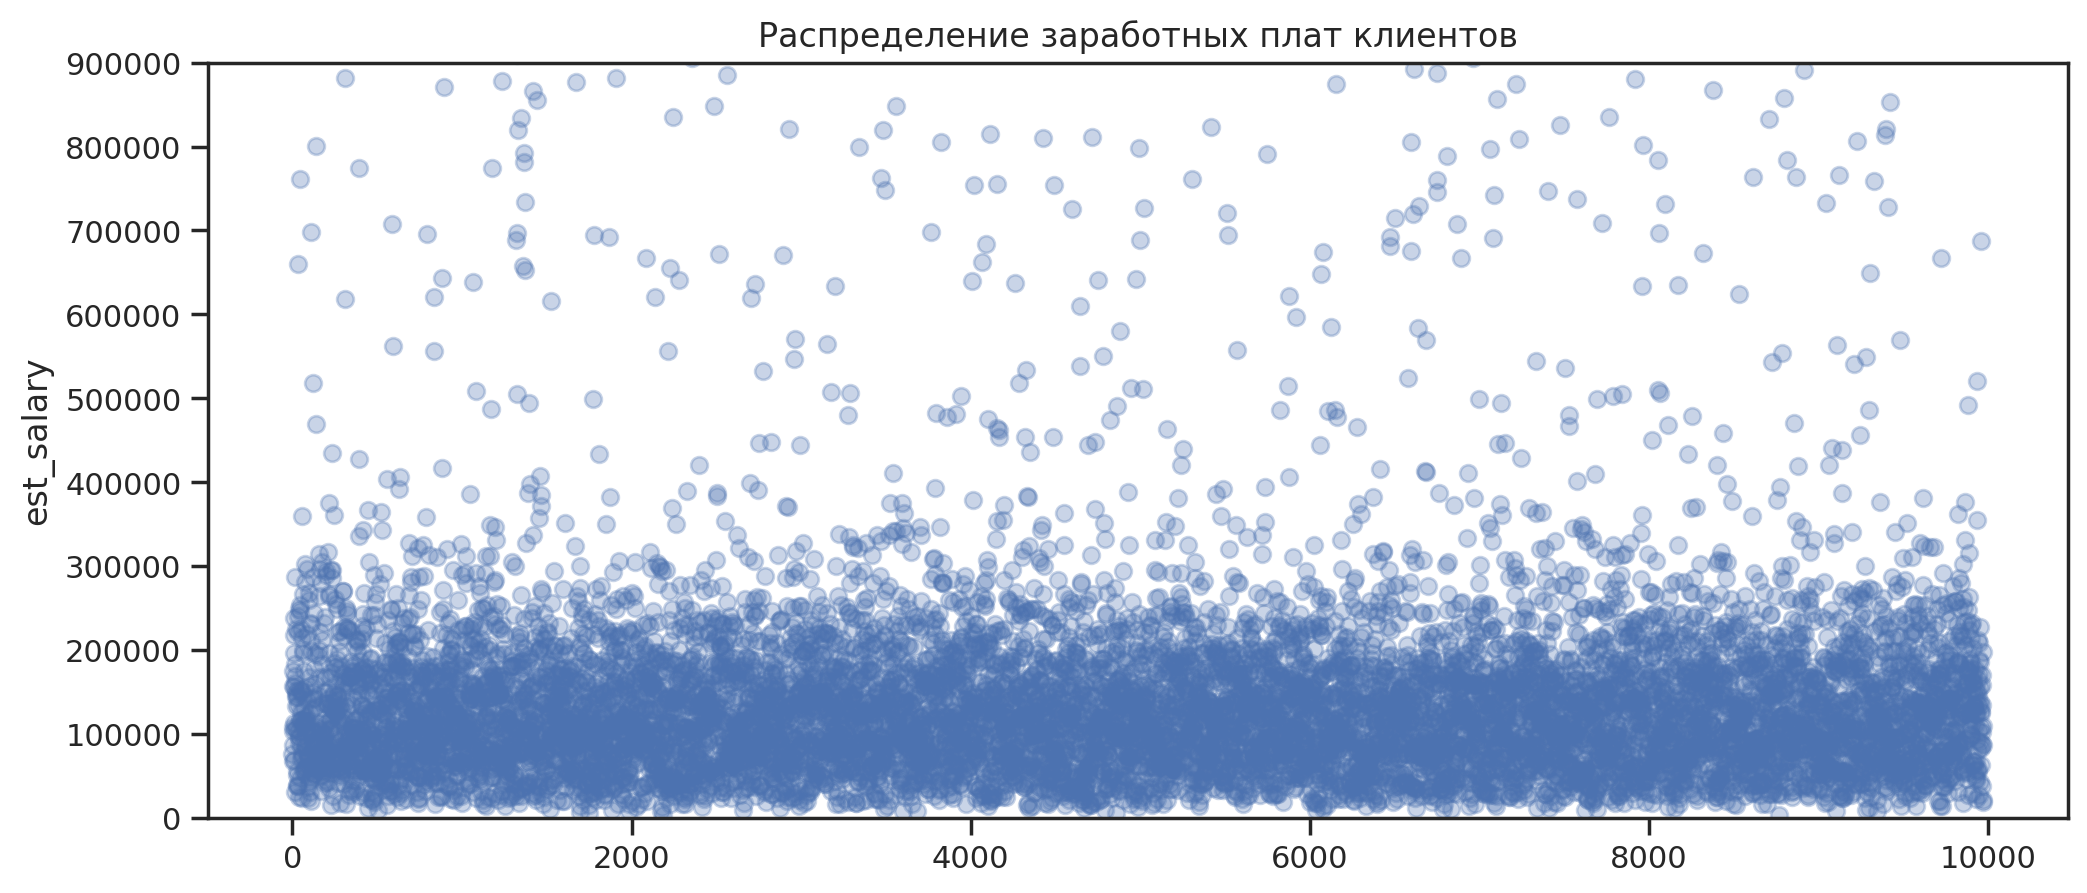

In [31]:
plt.ylim(0, 900000)
plt.scatter(x_values, data['est_salary'], alpha=0.3)
plt.ylabel('est_salary')
plt.title('Распределение заработных плат клиентов');

Мы видим, что основная масса заработных плат не превышает 400 тыс.

Посмотрим на нижнюю границу заработных плат, изменив масштаб по оси "y" в сторону малых значений.

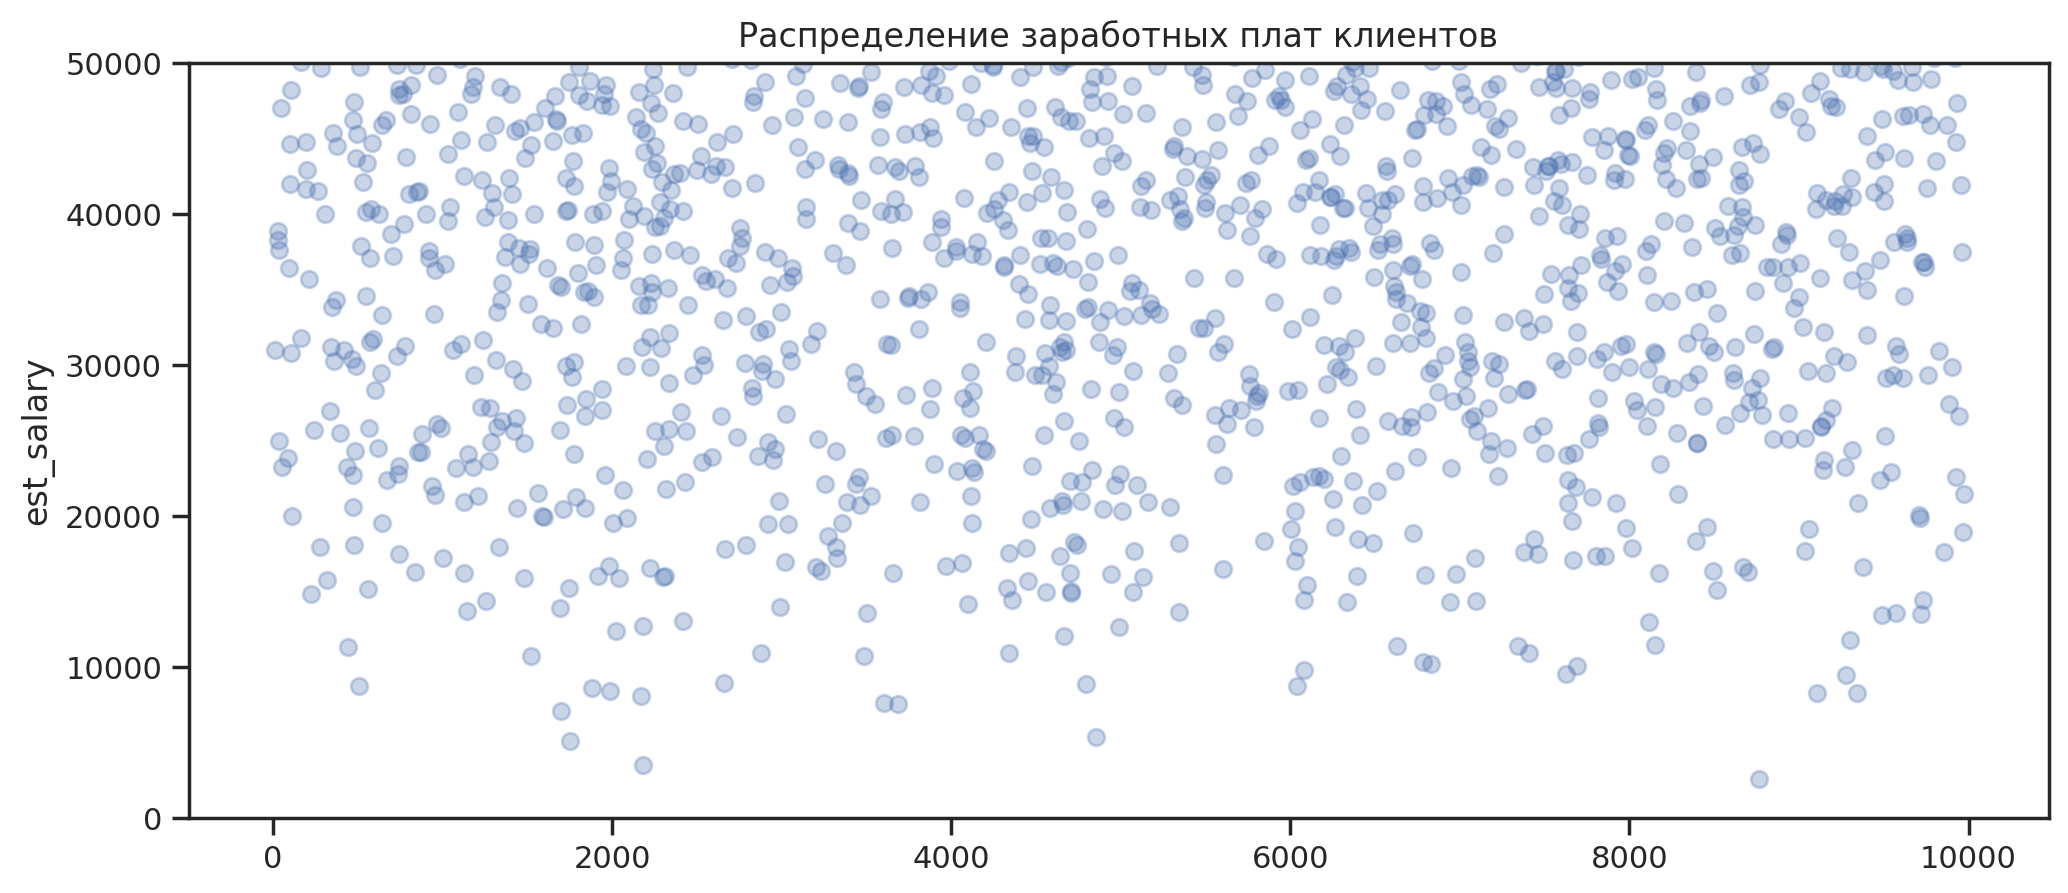

In [32]:
plt.ylim(0, 50000)
plt.scatter(x_values, data['est_salary'], alpha=0.3)
plt.ylabel('est_salary')
plt.title('Распределение заработных плат клиентов');

Мы видим, что основная масса заработных плат выше 15 тыс.

Посчитаем 1-й, 5-й, 95-й, 98-й и 99-й перцентили клиентских зарплат:

In [33]:
np.percentile(data['est_salary'], [1, 5, 95, 98, 99])

array([ 17340.9 ,  32080.3 , 316360.45, 665204.78, 886321.86])

Сделаем отсечку по 1-му и 98-му процентилям.

Таким образом, примем за аномальных клиентов тех, у кого зарплата меньше 17340 руб или больше 665205 руб., а также тех, у кого баланс больше 4 295 525 руб.   

Сделаем срез в нашем датафрейме, чтобы исключить аномалии.

In [34]:
data = data.query('est_salary <= 665205 & est_salary >= 17340 & balance <= 4295525')

In [35]:
len(data)

9613

Таким образом, убрав аномалии и удалив 26 строк с пропусками в колонке 'age' мы срезали около 4% исходных данных, что вполне допустимо.

**Выводы:**

Исходный датафрейм содержит 10000 строк и 12 столбцов, данные представлены тремя типами данных - int, float и object.  
Имеются пропуски в двух столбцах - age (26 пропусков) и balance (295 пропусков).  
Возраст клиентов находится в интервале от 18 до 86 лет.  
Баллы кредитного скоринга находятся в интервале от 642 до 1000.  
Оценка собственности клиента - в интервле от 0 до 9.  
Количество продуктов банка у клиентов - от 1 до 5 (чаще- 2 продукта), за исключением одного клиента у которого 0 продуктов.  
68% клиентов банка имеют кредитную карту.  
По балансу клиентов и заработной плате наблюдаем выбросы.  
Отток клиентов - 18%.  
Банк представлен в городах Ярославль, Рыбинск и Ростов (больше клиентов в Ярославле, меньше в Ростове).  
В таблице нет явных дубликатов.  

На этапе предобработки сделали следующее:
- привели некоторые столбцы к нужному типу  
- переименовали два столбца в классический вид  
- удалили строки с пропусками в колонке "age" , всего 26 штук (0.26% от всего датафрейма)  
- пропуски в балансе (23% от всего датафрейма) заполнили нулями  
- отсекли строки с аномалиями в клиентских балансах и заработных платах.  

Таким образом, в результате предобработки мы срезали около 4% исходных данных, что вполне допустимо.  
Окончательная таблица содержит информацию о 9613 клиентах банка. 

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

## Исследовательский анализ данных (EDA)

Посмотрим и сравним средние значения признаков двух групп — ушедших клиентов (churn=1) и действующих (churn=0).

In [36]:
data.groupby('churn').agg('mean')

user_id  score   age  equity   balance  products  credit_card  \
churn                                                                   
0     171882.46 844.90 42.99    2.39 458515.82      1.76         0.71   
1     170753.60 861.53 41.44    3.75 949516.67      2.37         0.55   

       last_activity  est_salary  
churn                             
0               0.48   131476.08  
1               0.70   135491.54

Мы видим, что у "отточных" клиентов в среднем:  
- баланс на счёте в два раза больше  
- меньше кредитных карт  
- активность больше  
- оценка собственности немного выше  
- количество продуктов банка чуть больше




**Распределения признаков.**

Соберём в DataFrame название колонок и названия графиков:

In [37]:
numeric = pd.DataFrame({'col' : ['score', 'age', 'equity', 'balance', 'products', 'est_salary'], 
                        'title' : ['Баллы кредитного скорринга', 'Возраст', 
                                   'Оценка собственности клиента', 
                                   'Баланс', 'Количество продуктов банка', 
                                   'Заработная плата клиента']
                       })

categorical = pd.DataFrame({'col' : ['city', 'gender',  'credit_card', 'last_activity'],
                            'title' : ['Город', 'Пол',  'Наличие кредитной карты', 'Активность']
                            })

С помощью цикла выведем гистограммы распределения и диаграммы размаха для числовых признаков:

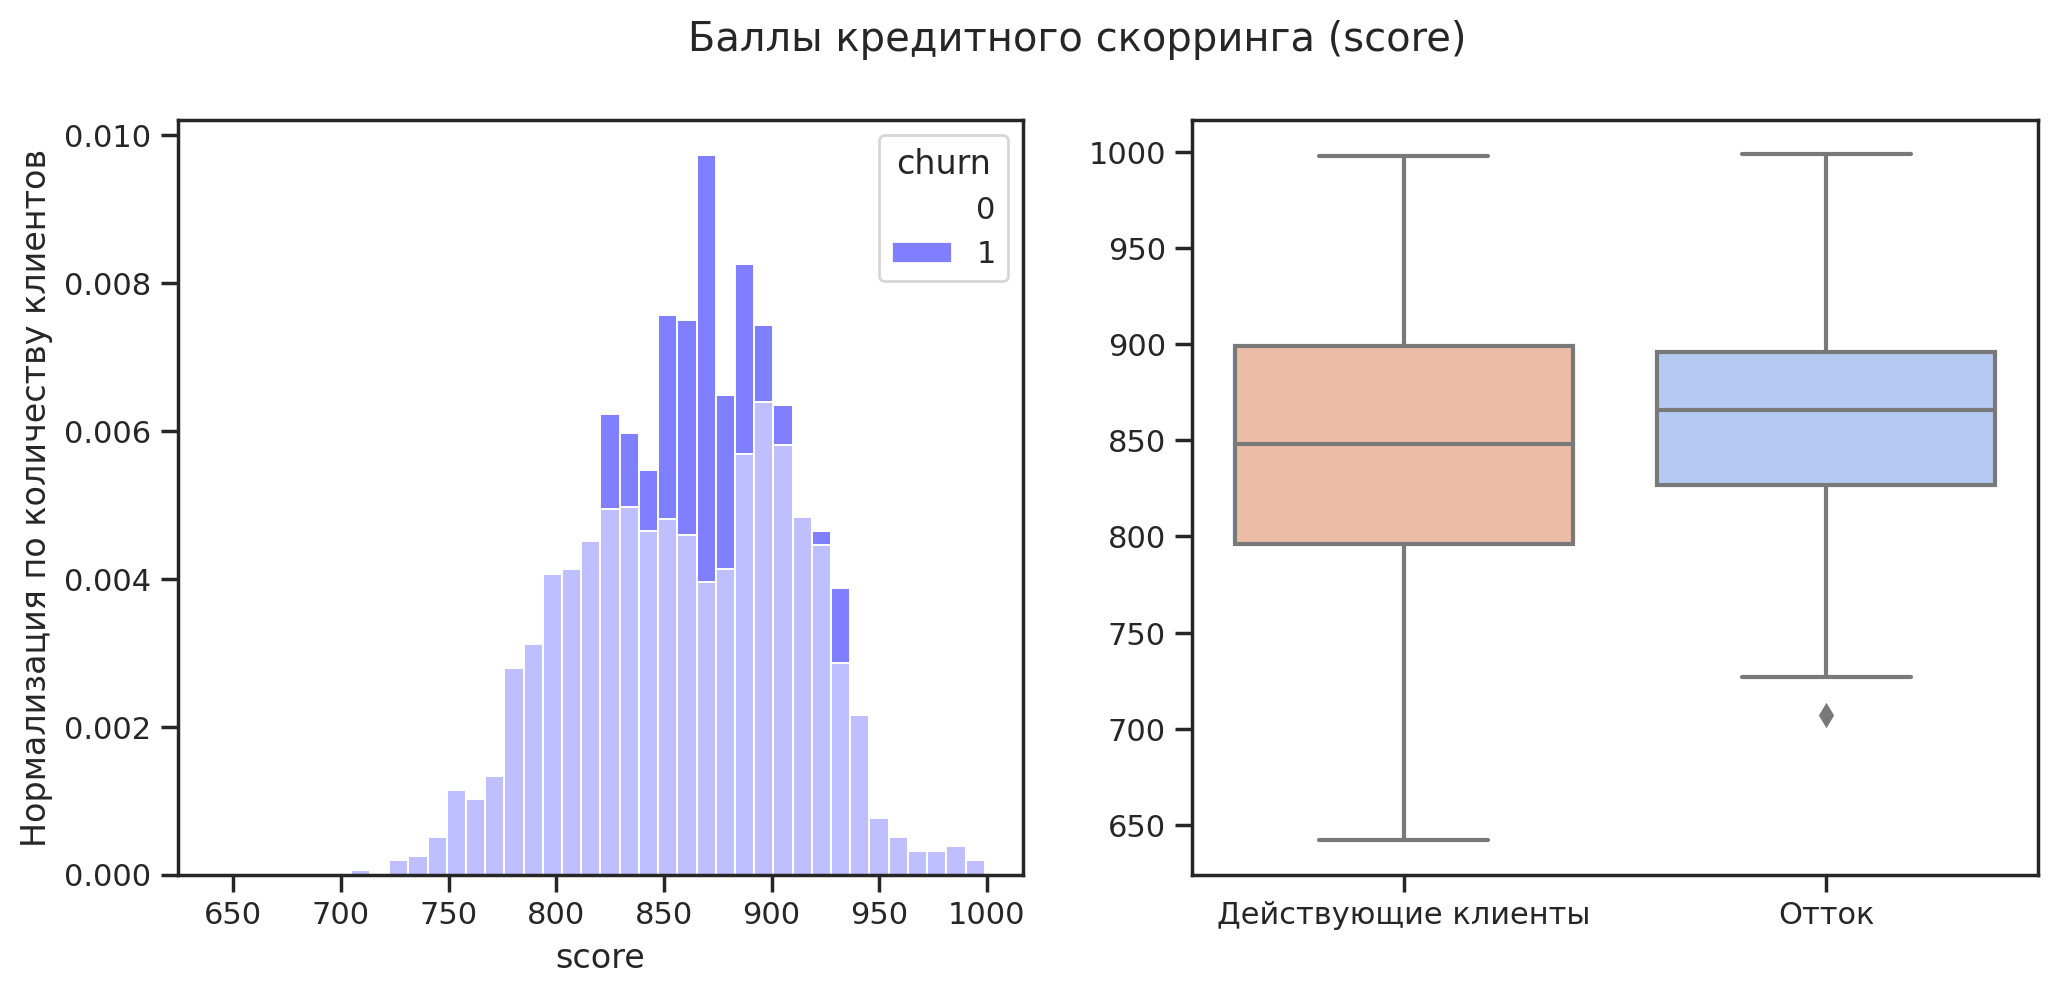

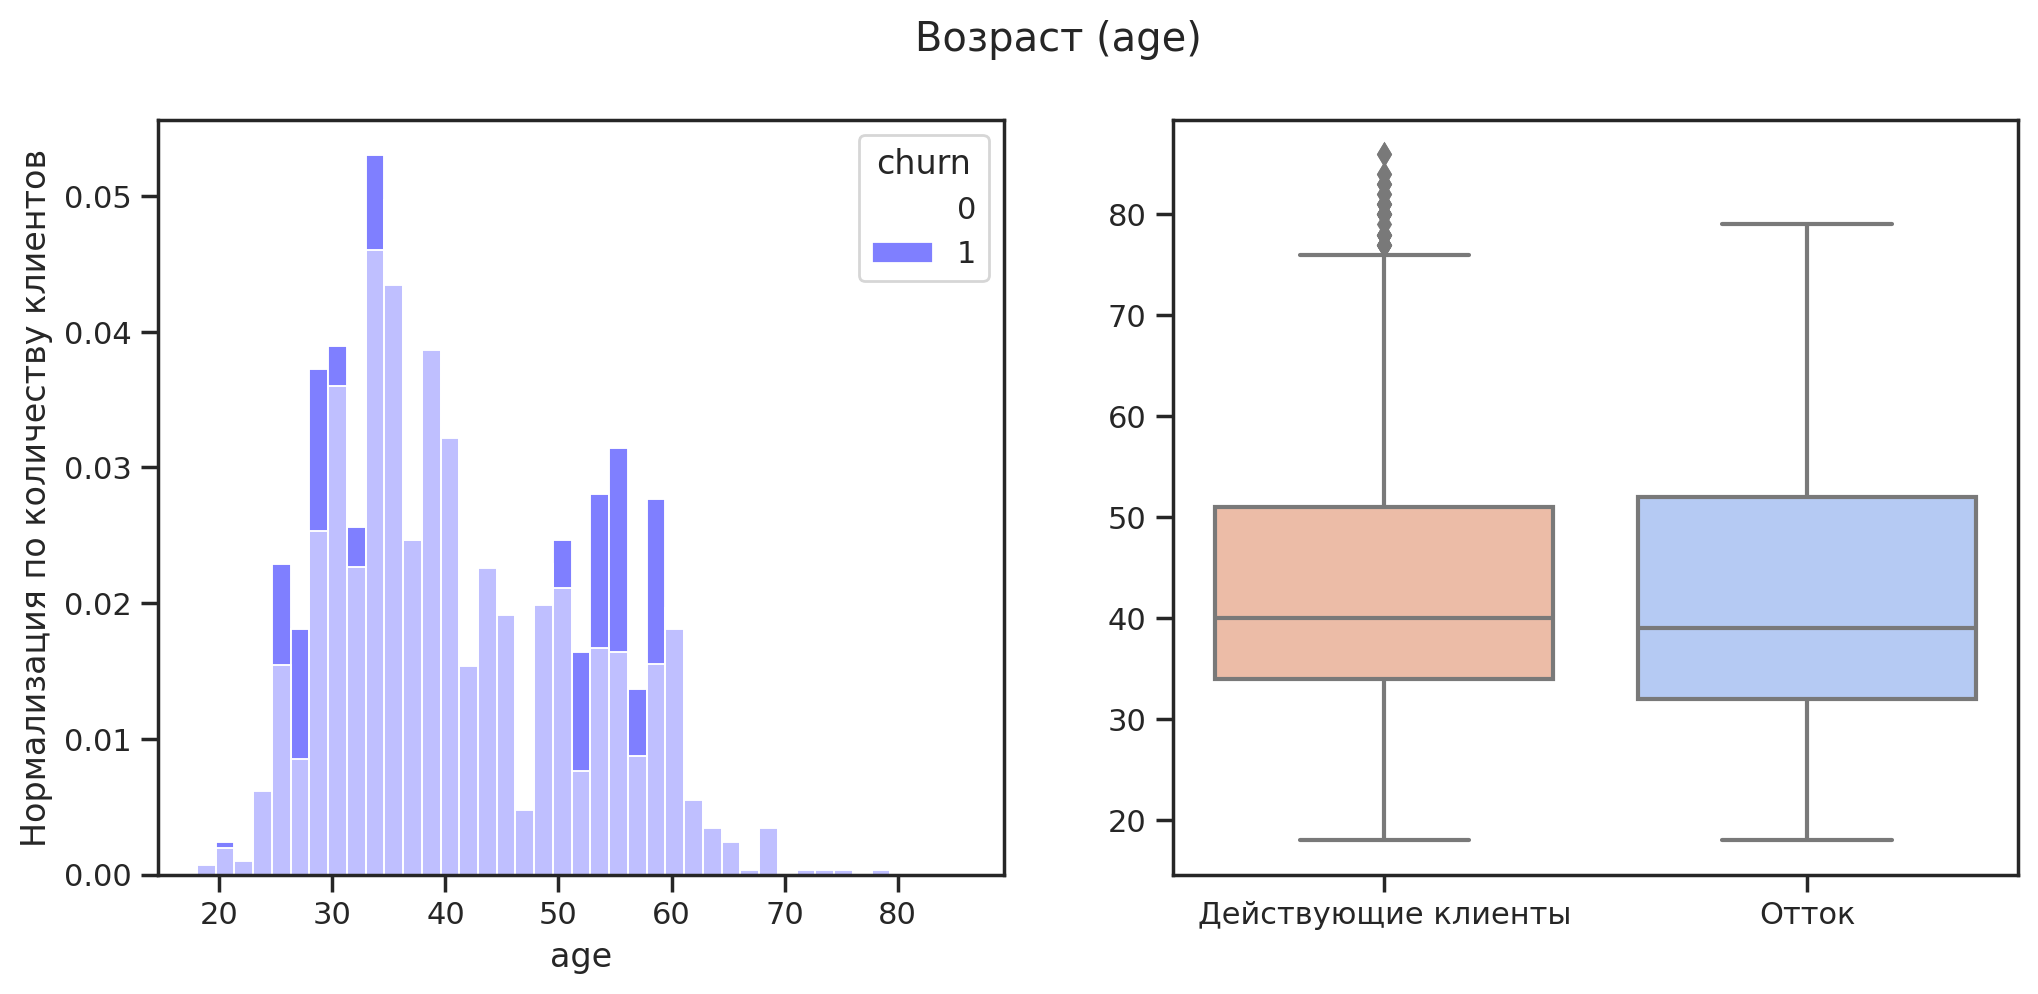

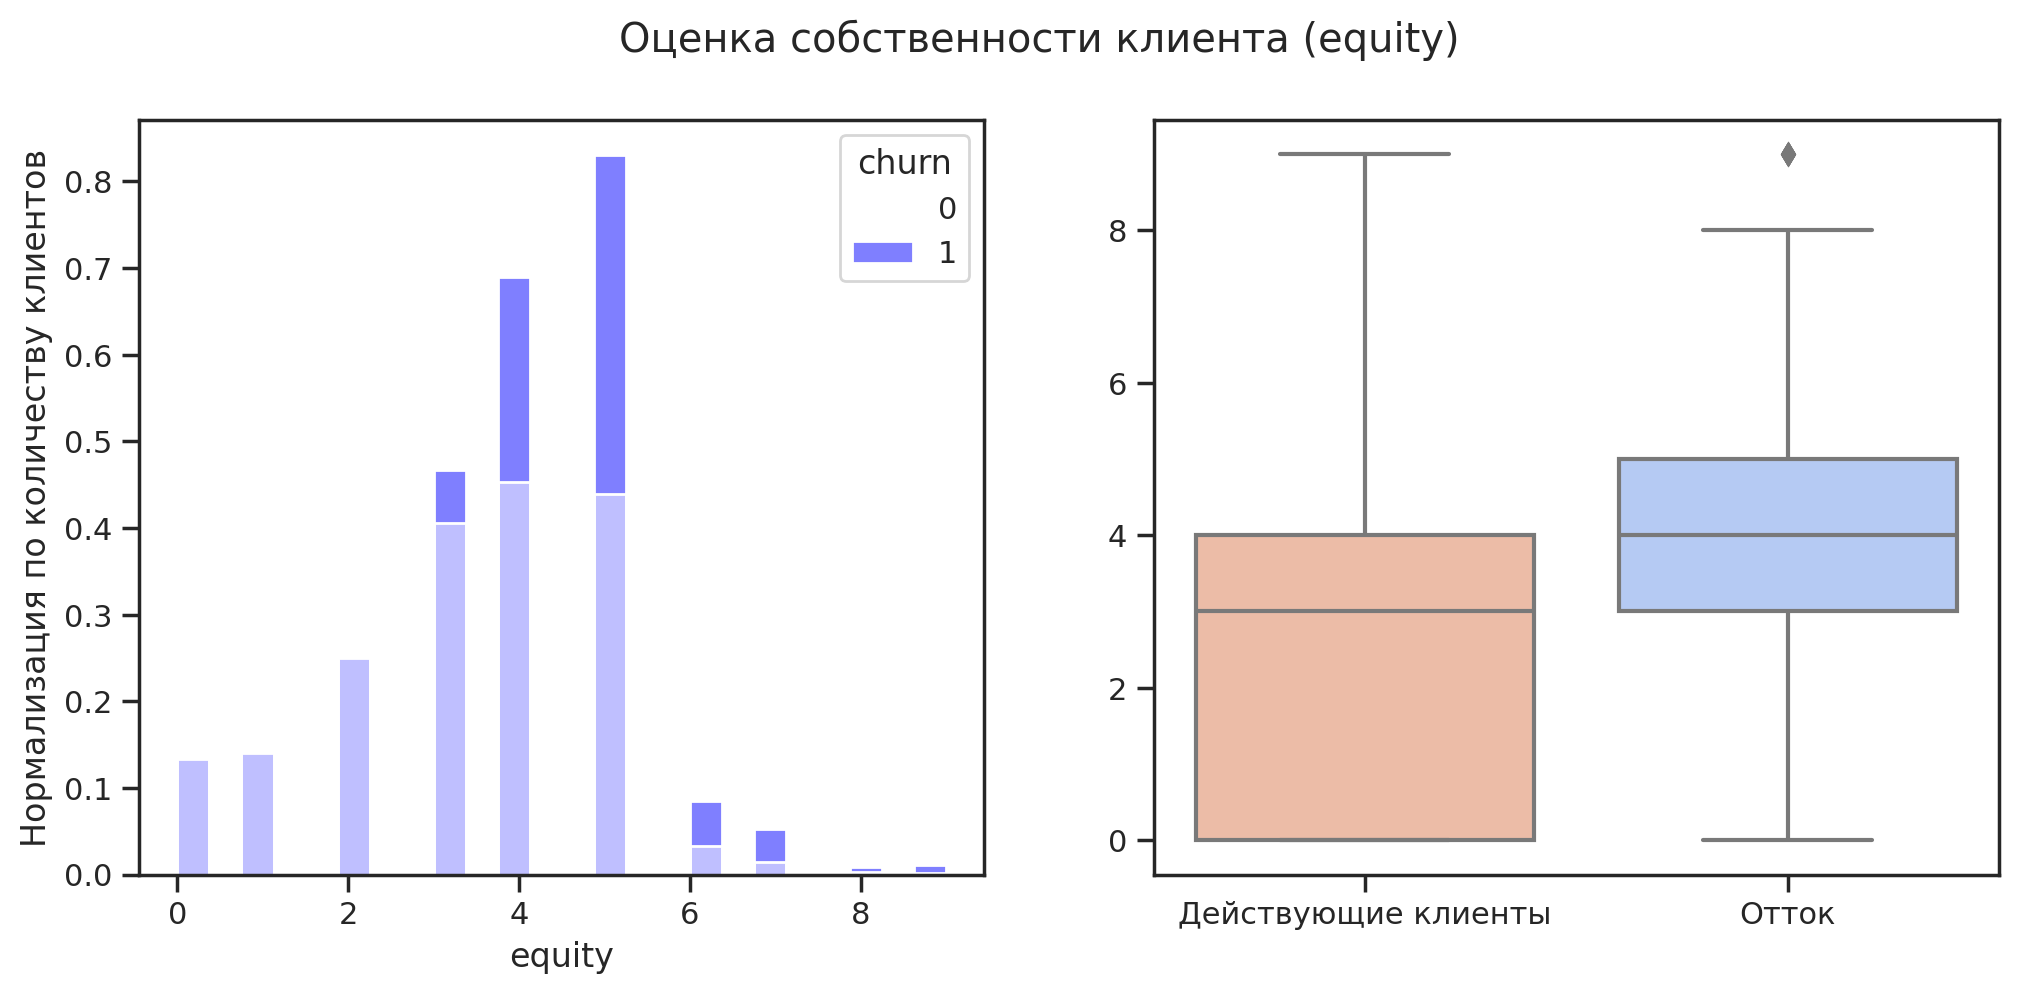

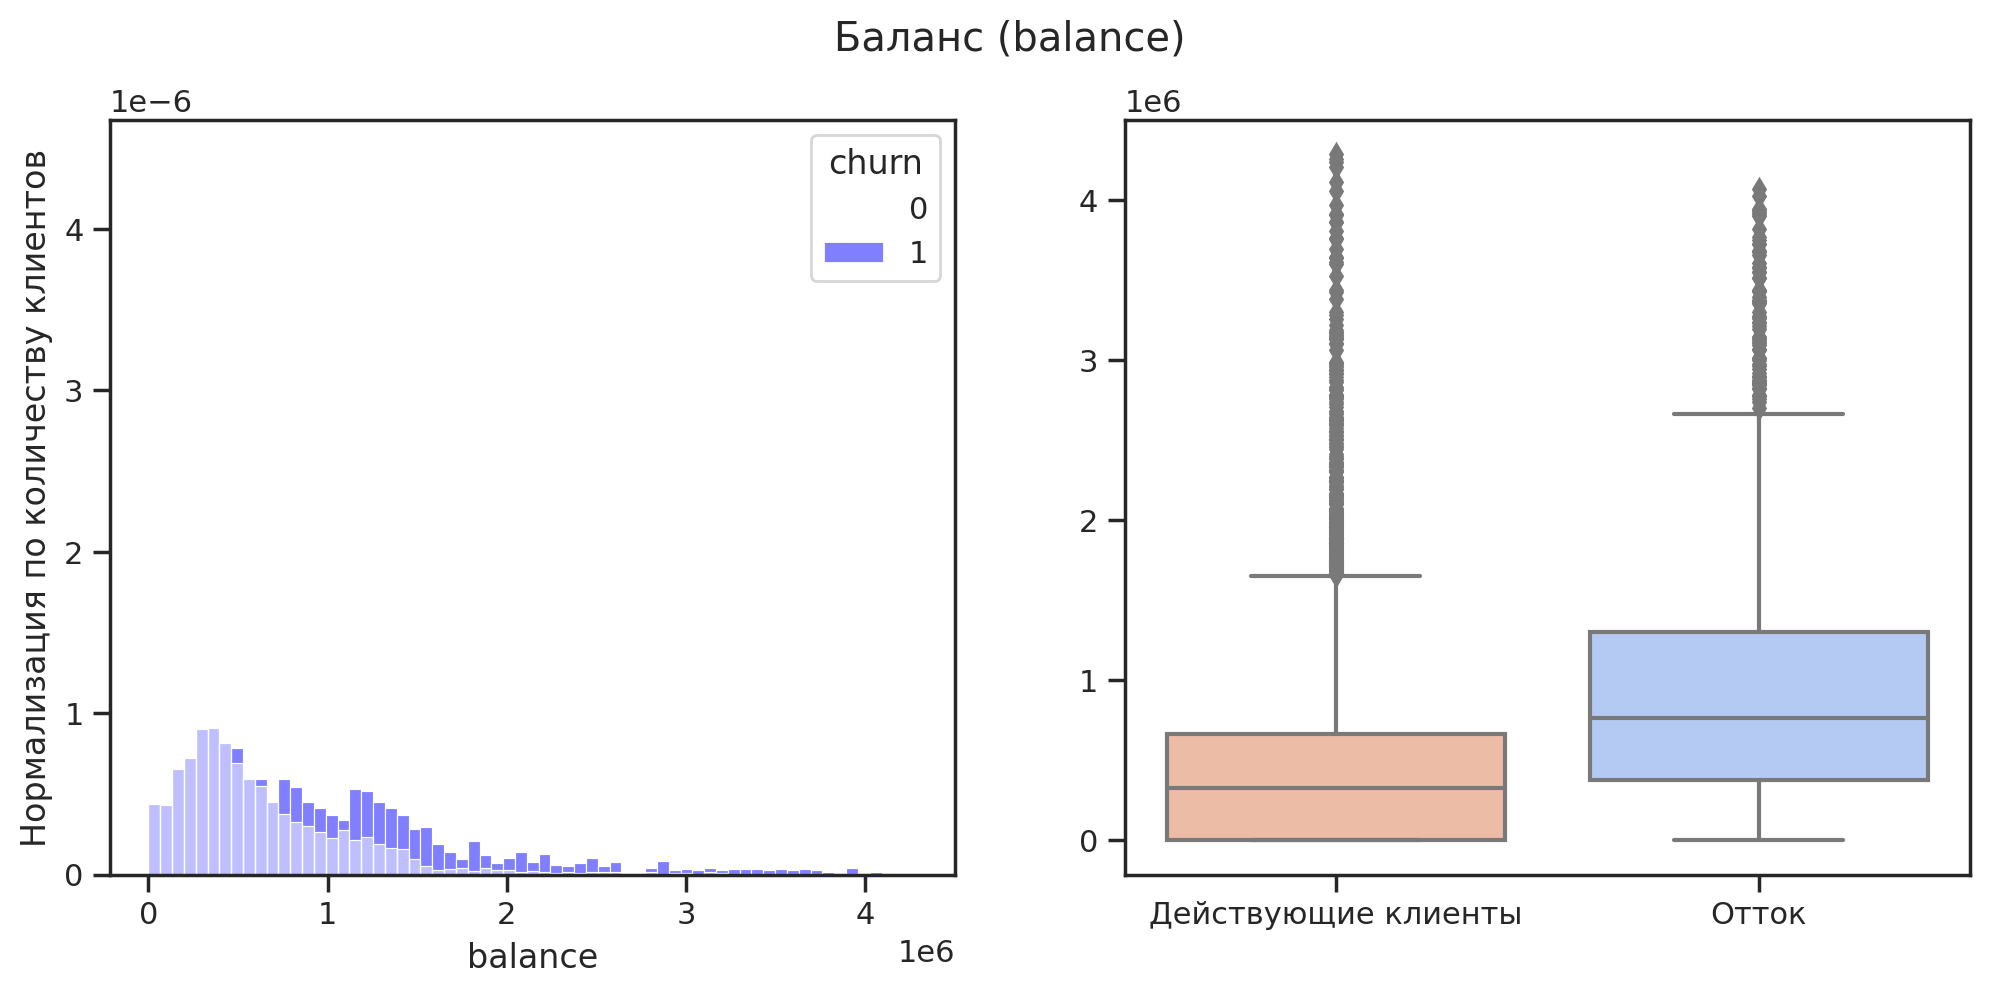

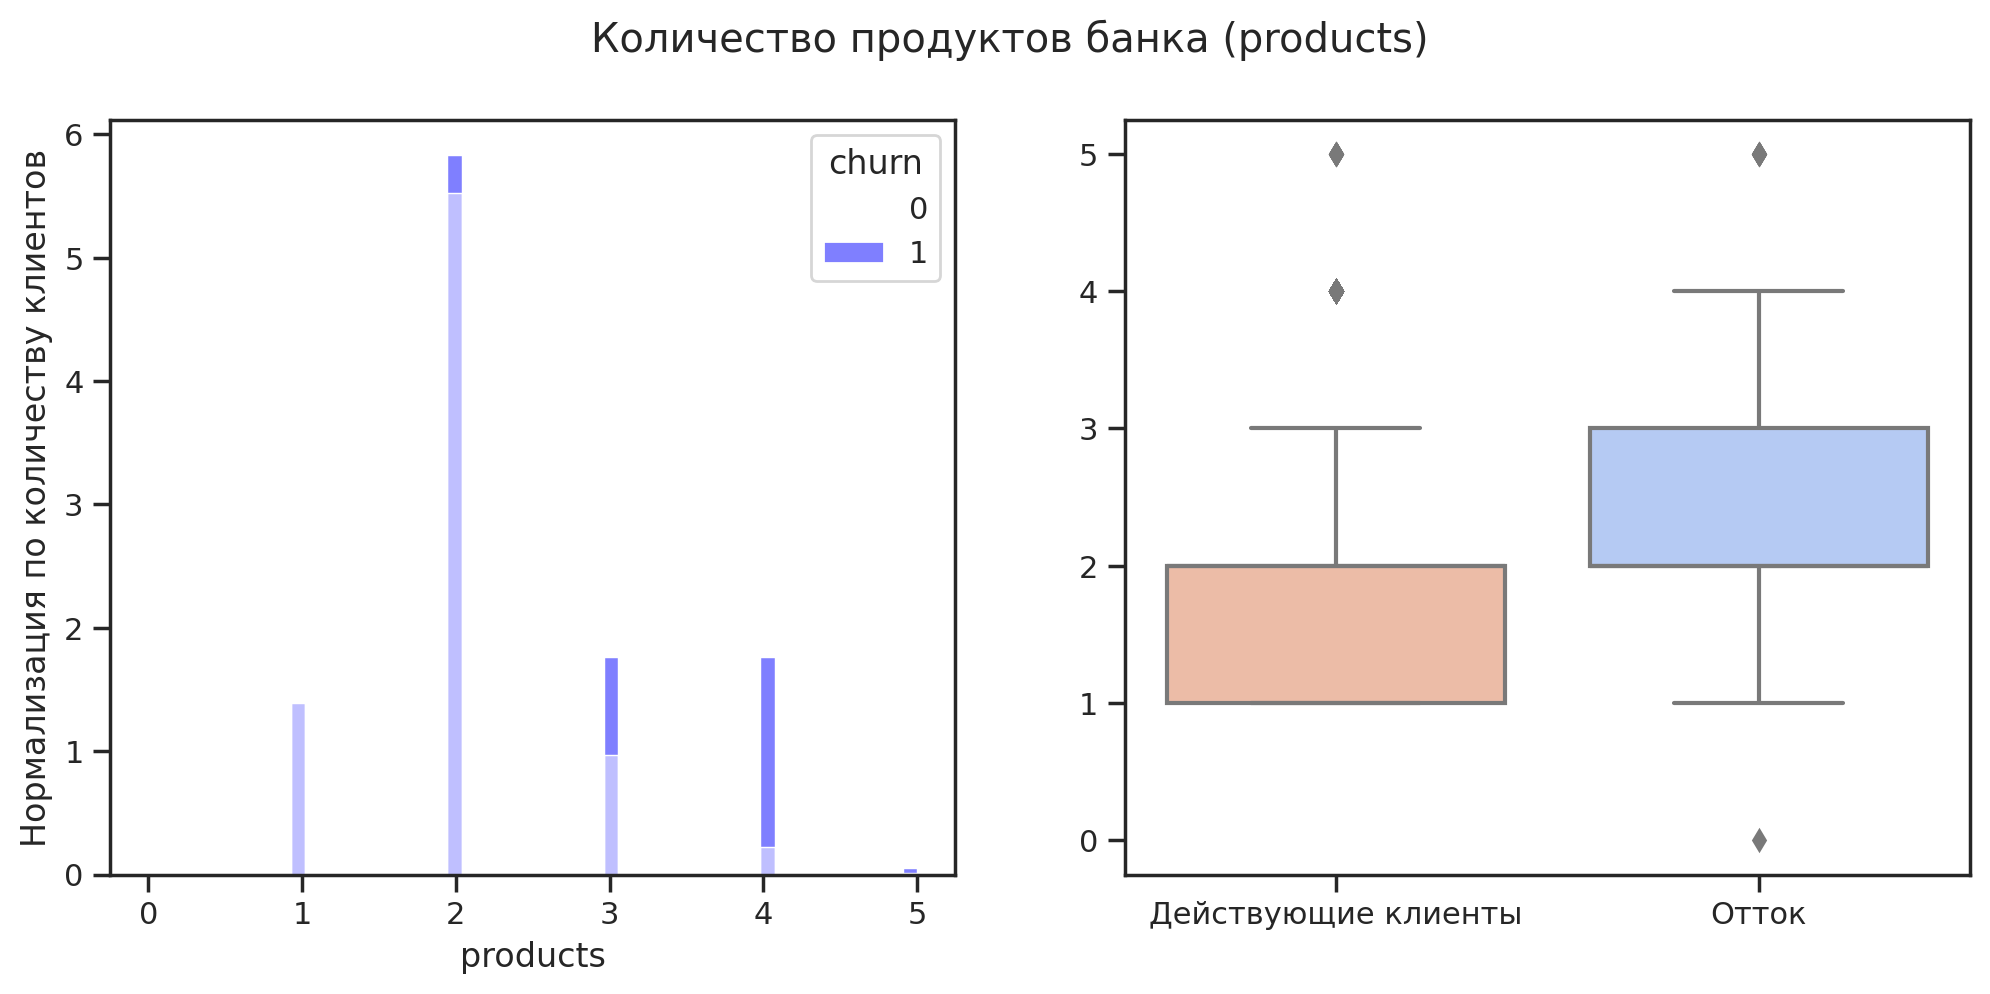

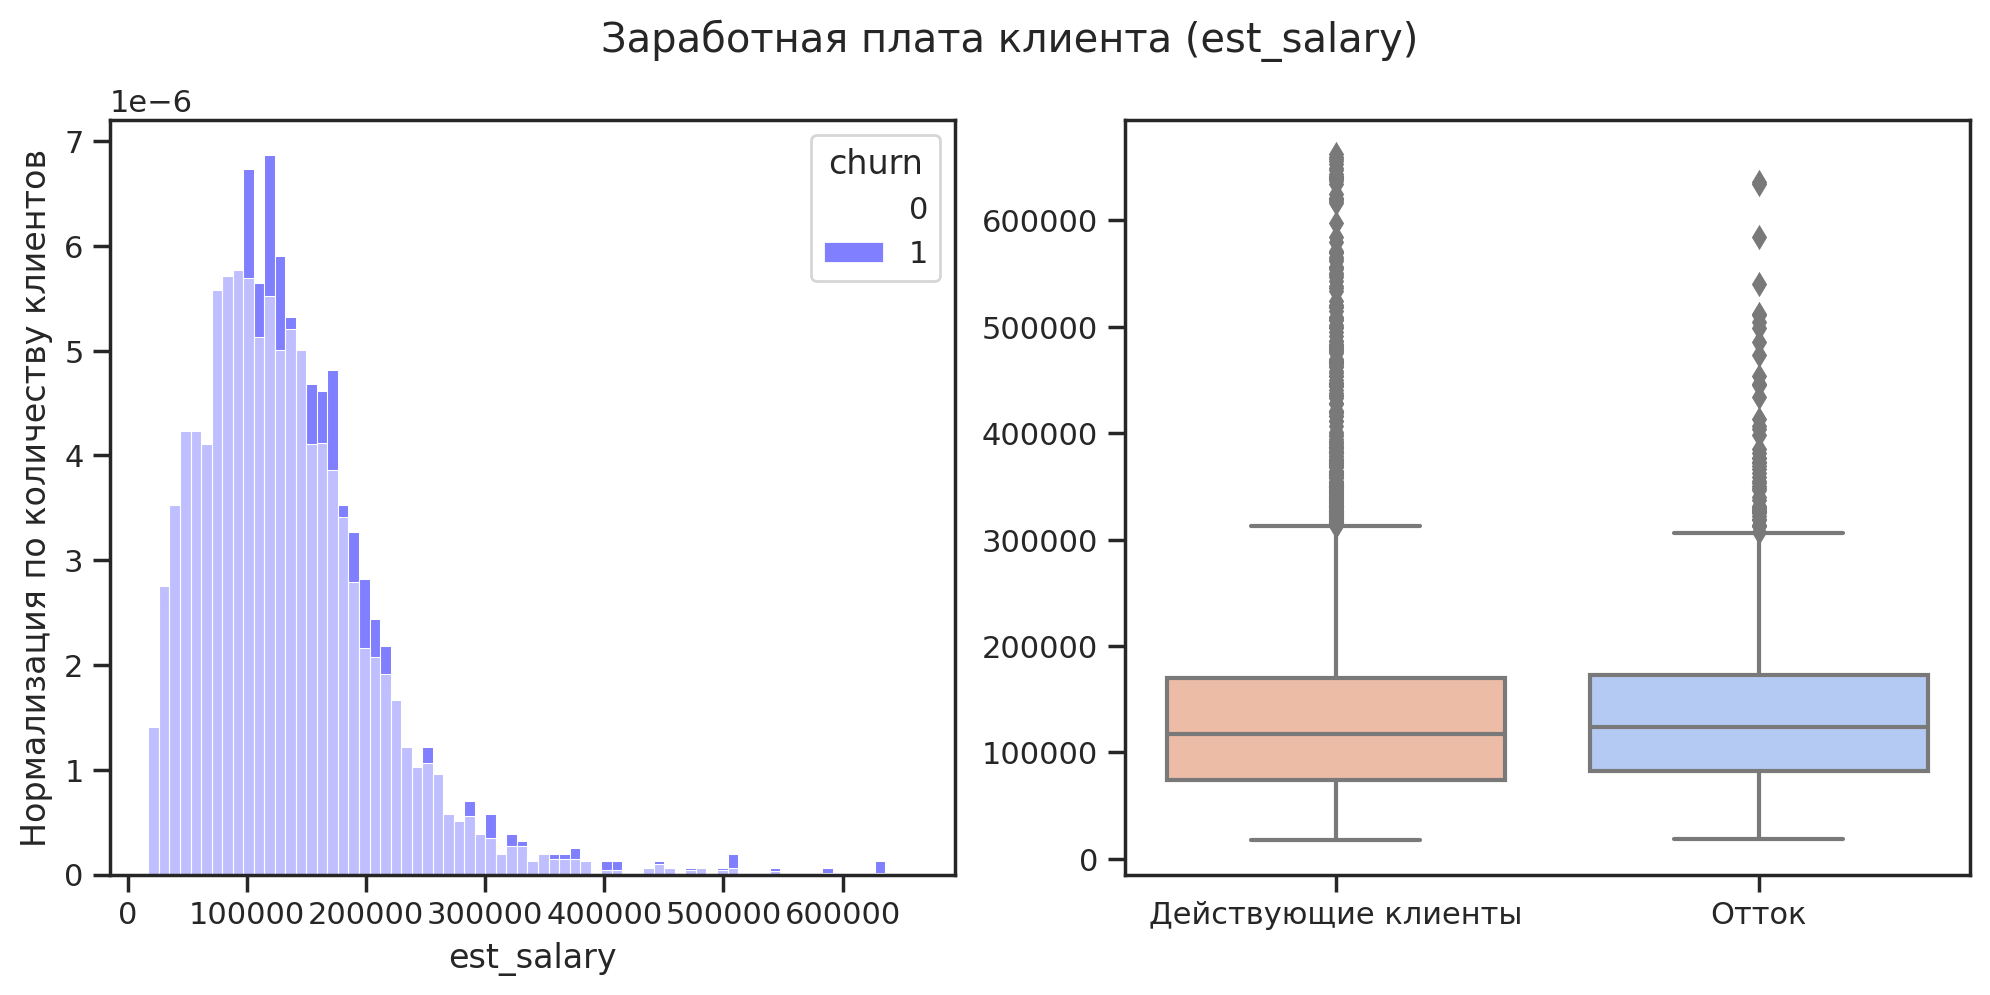

In [38]:
for row in numeric.itertuples():
    
    fig, ax = plt.subplots()
    
    sns.histplot(data=data, hue='churn', x= row[1], stat='density', 
                 common_norm=False, palette = 'flag', ax = plt.subplot(1, 2, 1))
    
    plt.xlabel(row[1])
    plt.ylabel('Нормализация по количеству клиентов')
    
    
    sns.boxplot(data = data, x = 'churn', y = row[1], ax = plt.subplot(1, 2, 2), palette='coolwarm_r') 
    
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(np.arange(2), ('Действующие клиенты', 'Отток'))
    
    fig.suptitle(row[2] + ' (' + row[1] + ')')
    plt.show()    

Посчитаем отток в срезе кредитного скоринга 820-890.

In [39]:
len(data.query('score>=820 & score<=890 & churn==1')) / len(data.query('score>=820 & score<=890'))

0.2535410764872521

Посчитаем отток в срезе возраста 25-33 и 50-58.

In [40]:
len(data.query('((age>=25 & age<=33) | (age>=50 & age<=58))& churn==1')) / len(data.query('(age>=25 & age<=33) | (age>=50 & age<=58)'))

0.24054128693731014

Посчитаем отток в срезе оценки собственности клиента от 4-х и выше.

In [41]:
len(data.query('equity>=4 & churn==1')) / len(data.query('equity>=4'))

0.2853100077180345

Посчитаем отток в срезе баланса клиента от 600 тыс. и выше.

In [42]:
len(data.query('balance>=600000 & churn==1')) / len(data.query('balance>=600000'))

0.31514408338442673

Посчитаем отток в срезе количества продуктов банка у клиента от 3-х и выше.

In [43]:
len(data.query('products>=3 & churn==1')) / len(data.query('products>=3'))

0.3989071038251366

Посчитаем отток в срезе заработной платы клиента от 99 тыс до 210 тыс.

In [44]:
(
len(data.query('est_salary>=99000 & est_salary<=210000 & churn==1')) / 
len(data.query('est_salary>=99000 & est_salary<=210000'))
)

0.20478489903424058

**Вывод:**

По графикам видим, что **значительный отток зафиксирован у клиентов со следующими признаками:**

- балл кредитного скоринга в интервале 820-890 (отток составляет 25.4%)  
- возраст 25-33 и 50-58 лет (отток составляет 24%)
- оценка собственности клиента от 4-х и выше (отток составляет 28.5%)
- баланс клиента от 600 тыс.руб. (отток составляет 31.5%)
- количество продуктов банка от 3-х и более (отток составляет 39.9%)
- заработная плата клиентов от 99 тыс до 210 тыс. (отток составляет 20.5%)

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

С помощью цикла выведем столбчатые диаграммы и диаграммы размаха **для категориальных признаков:**

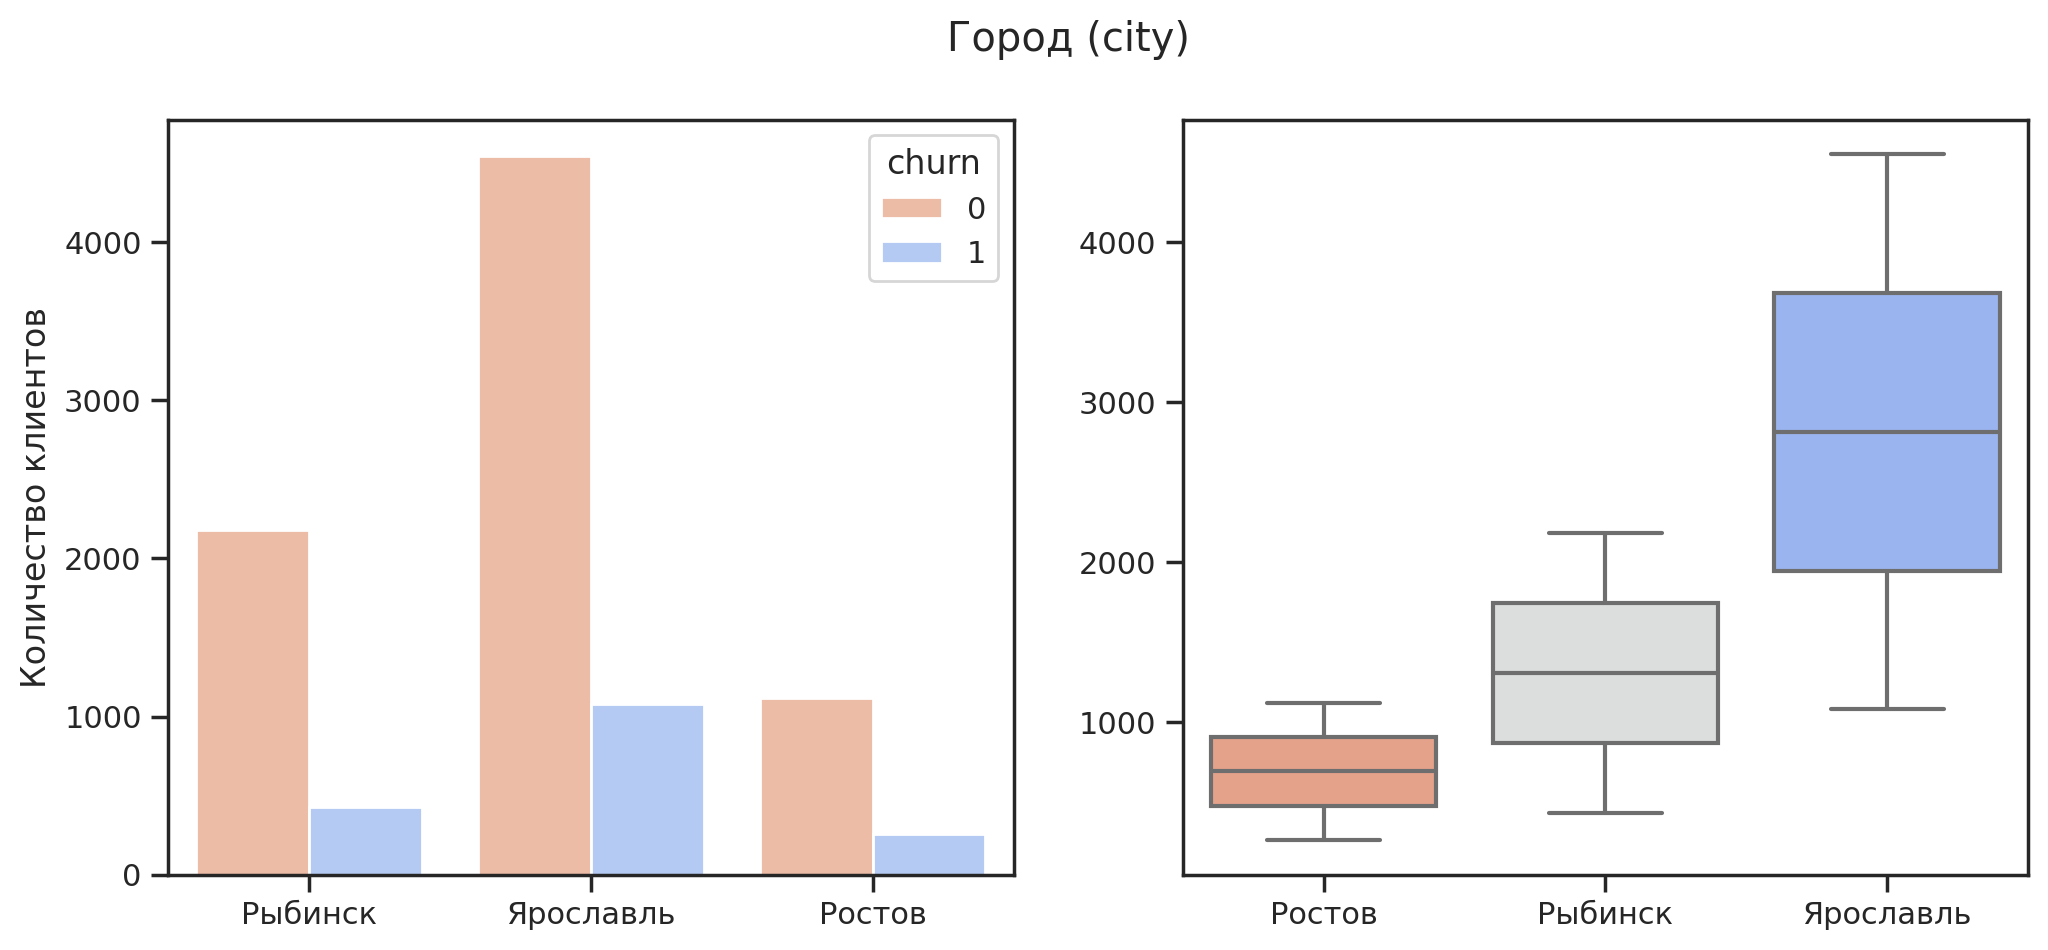

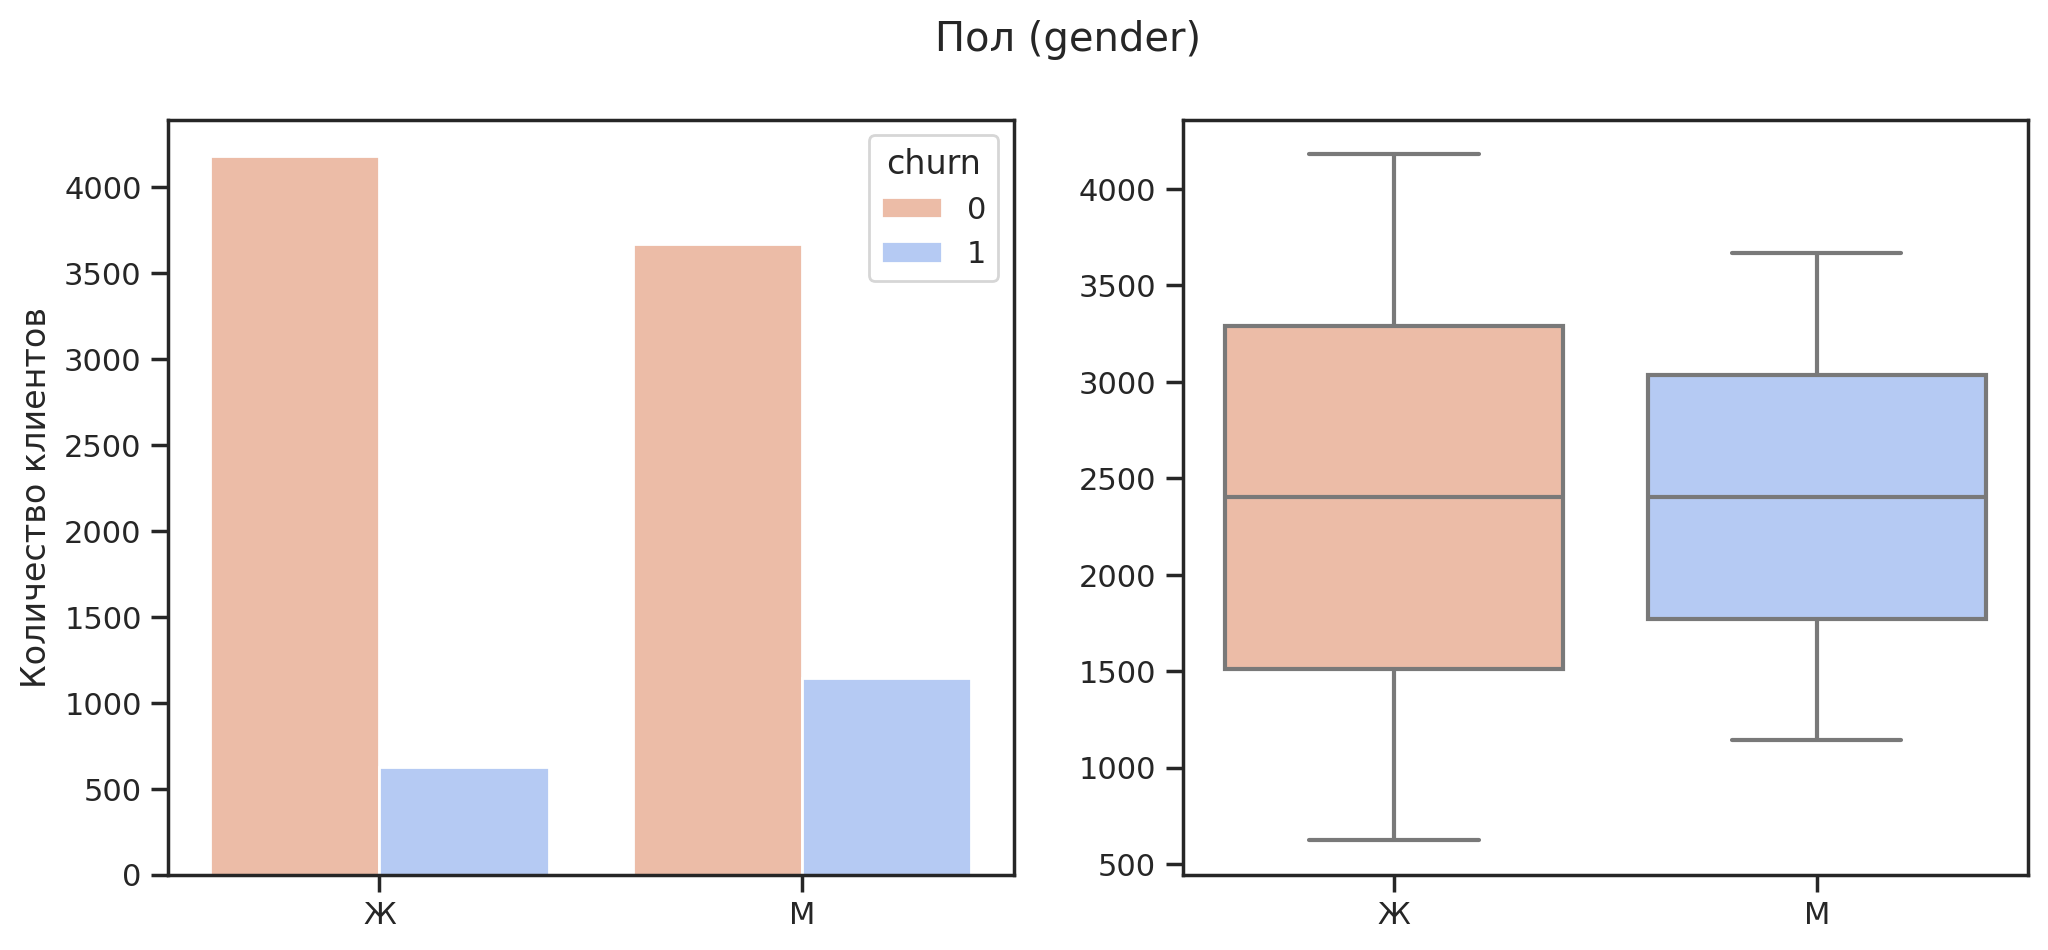

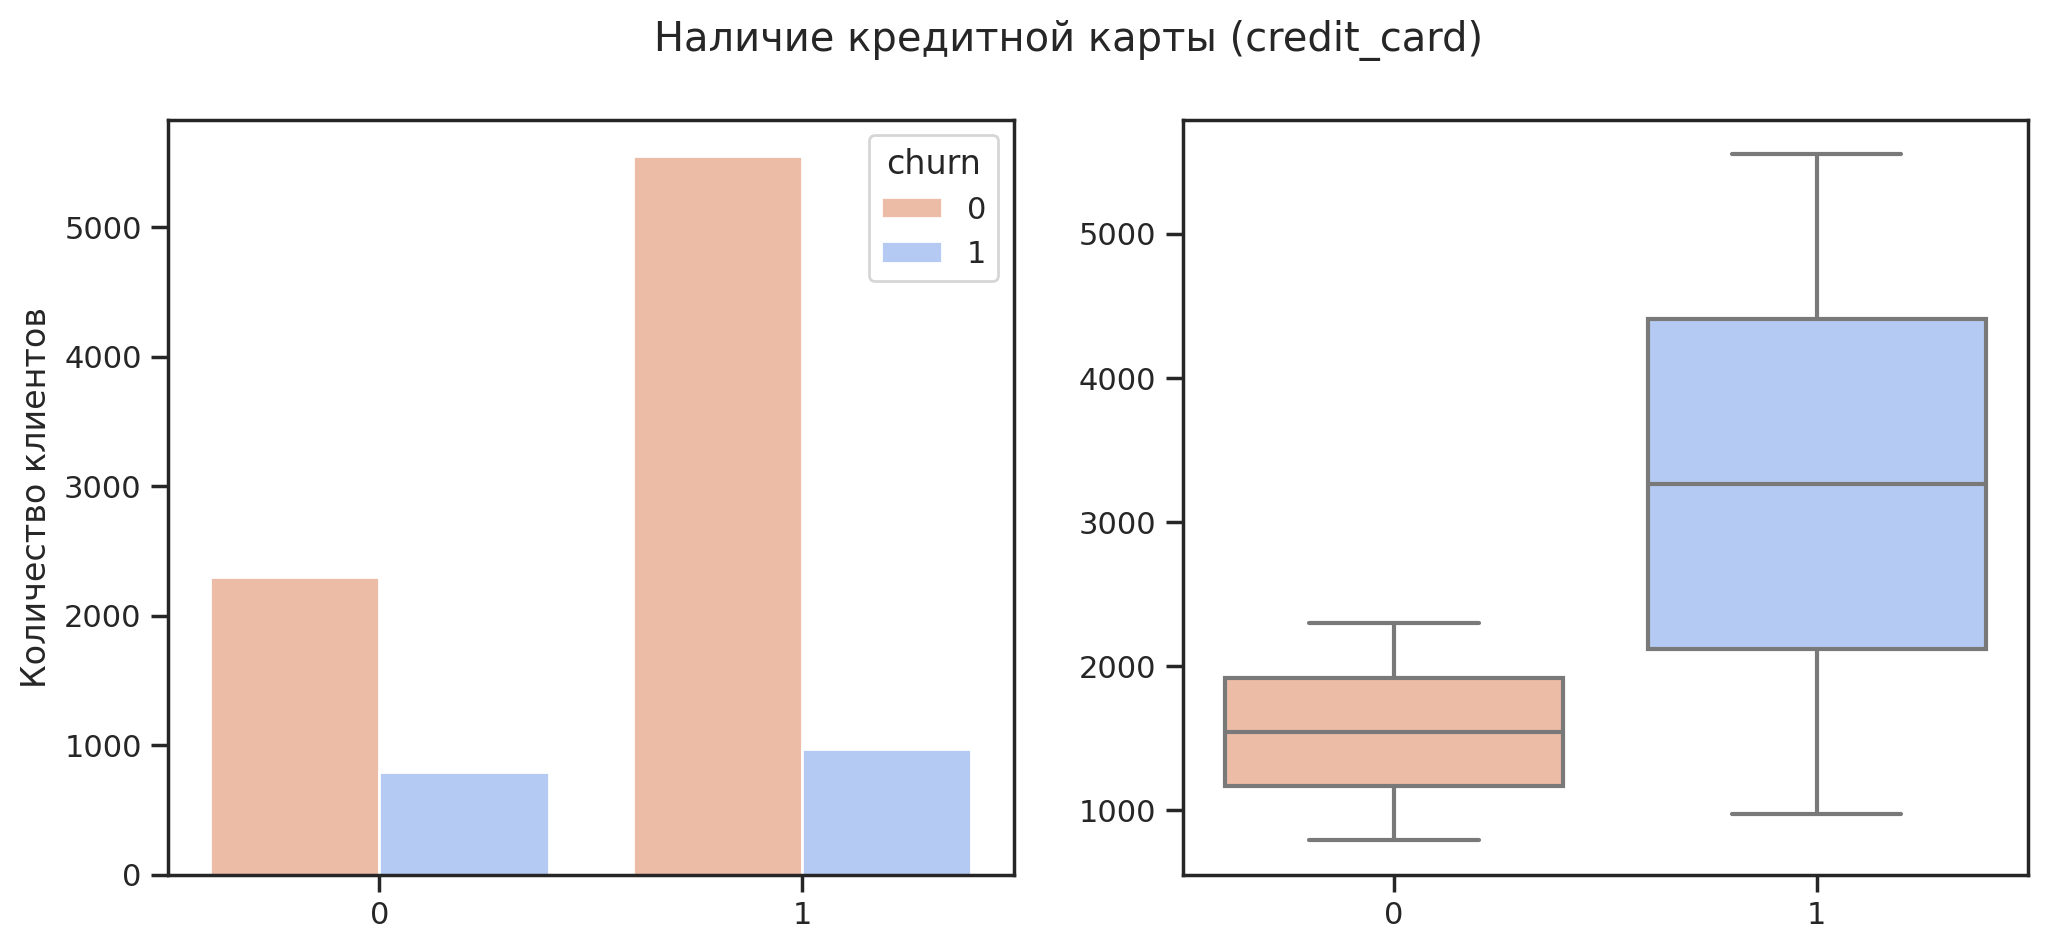

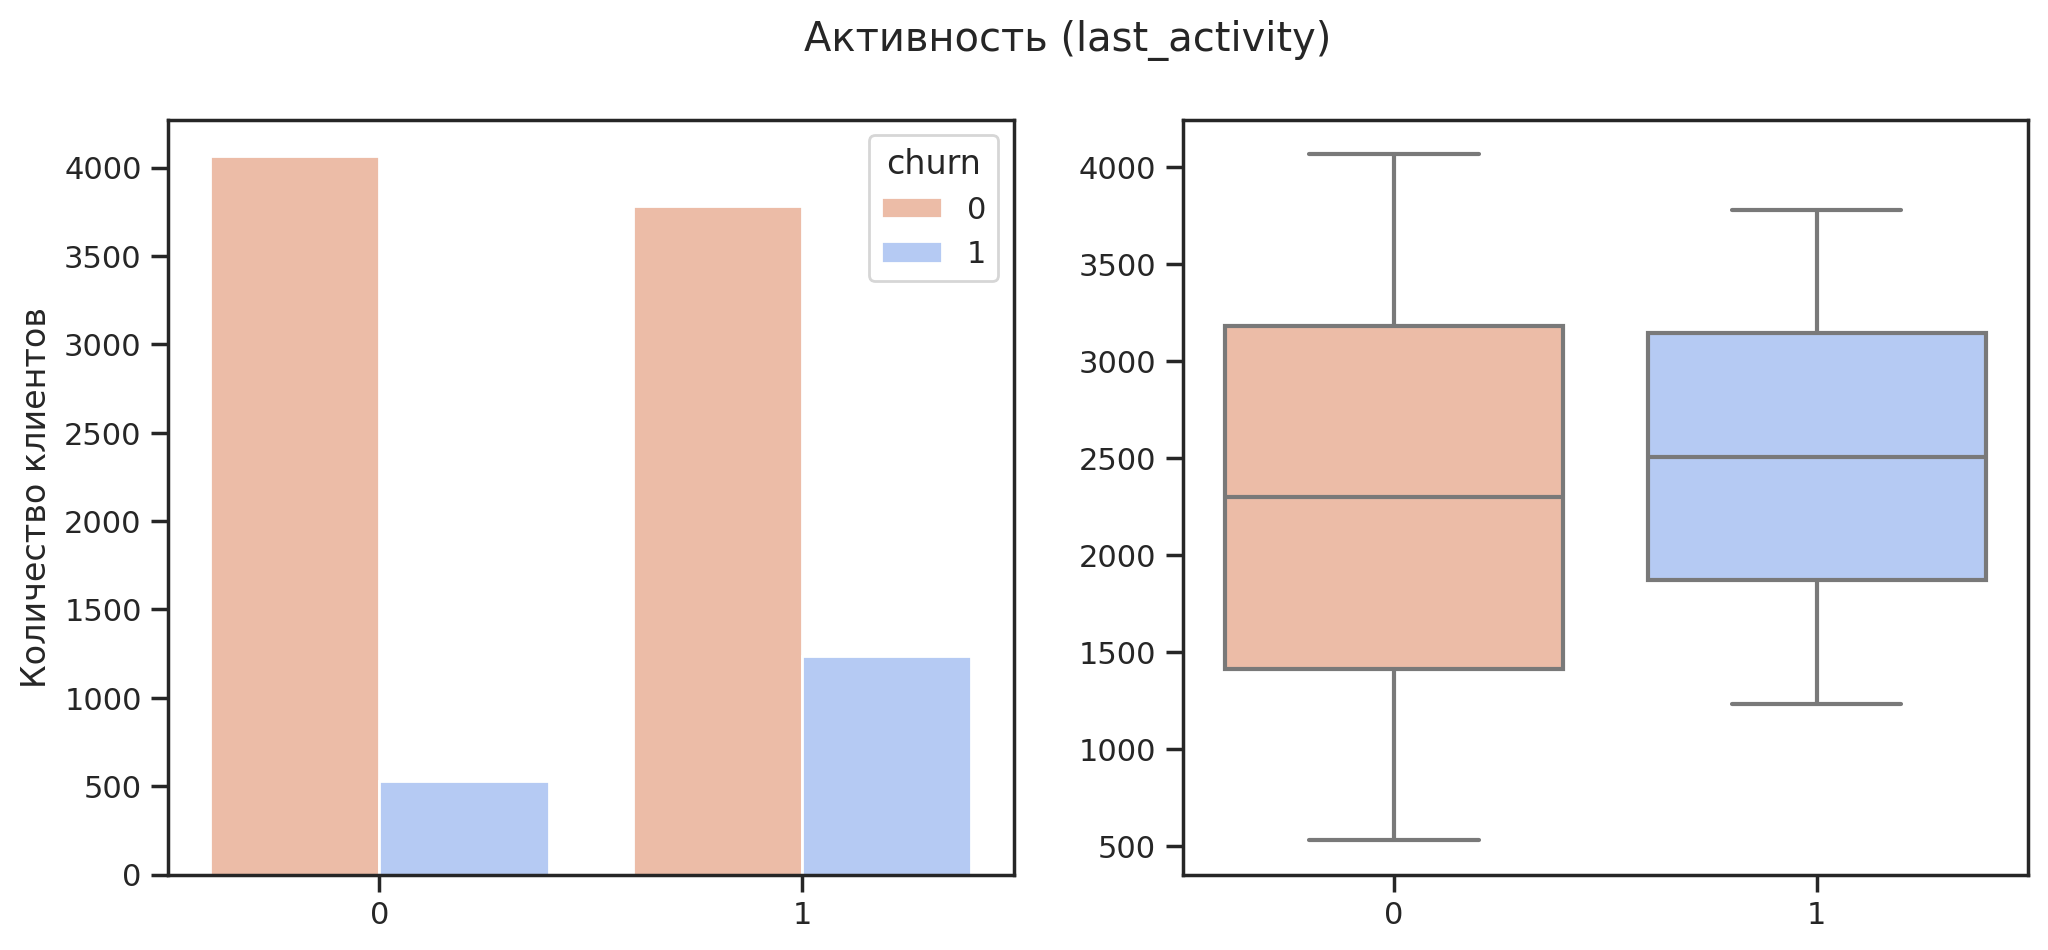

In [45]:
for row in categorical.itertuples():
    
    fig, ax = plt.subplots()
    
    sns.countplot(data = data, x = row[1], hue = 'churn', ax = plt.subplot(1, 2, 1),  palette='coolwarm_r')
    # stat='density', common_norm=False, palette = 'flag', ax = plt.subplot(1, 2, 1))
    
    plt.xlabel('')
    plt.ylabel('Количество клиентов')
    
    group = data.groupby([row[1], 'churn']).agg(count=('city', 'count')).reset_index()
    sns.boxplot(data = group, x = row[1], y = 'count', ax = plt.subplot(1, 2, 2), palette='coolwarm_r') 
    
    plt.xlabel('')
    plt.ylabel('')
    
    fig.suptitle(row[2] + ' (' + row[1] + ')')
    plt.show()

**Вывод:**

По графикам видим, что 
- отток среди клиентов мужского пола почти в два раза выше, чем женского
- отток среди владельцев кредитных карт почти в два раза меньше, чем у тех у кого её нет
- среди активных клиентов отток значительно больше, чем у неактивных.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**Матрица корреляции.**

Установим индексами датафрейма идентификаторы клиентов:

In [46]:
df = data.set_index('user_id')

Выведем phik-матрицу корреляции:

In [47]:
phik_overview = df.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


score  city  gender  age  equity  balance  products  \
score           1.00  0.08    0.06 0.05    0.53     0.41      0.31   
city            0.08  1.00    0.01 0.09    0.05     0.06      0.22   
gender          0.06  0.01    1.00 0.29    0.07     0.09      0.12   
age             0.05  0.09    0.29 1.00    0.04     0.19      0.14   
equity          0.53  0.05    0.07 0.04    1.00     0.62      0.44   
balance         0.41  0.06    0.09 0.19    0.62     1.00      0.33   
products        0.31  0.22    0.12 0.14    0.44     0.33      1.00   
credit_card     0.20  0.08    0.20 0.16    0.21     0.26      0.46   
last_activity   0.04  0.03    0.02 0.09    0.05     0.00      0.19   
est_salary      0.36  0.15    0.16 0.43    0.30     0.34      0.16   
churn           0.23  0.02    0.22 0.18    0.35     0.39      0.44   

               credit_card  last_activity  est_salary  churn  
score                 0.20           0.04        0.36   0.23  
city                  0.08           0.03        0.15   0.02  
gender                0.20           0.02        0.16   0.22  
age                   0.16           0.09        0.43   0.18  
equity                0.21           0.05        0.30   0.35  
balance               0.26           0.00        0.34   0.39  
products              0.46           0.19        0.16   0.44  
credit_card           1.00           0.05        0.02   0.20  
last_activity         0.05           1.00        0.00   0.26  
est_salary            0.02           0.00        1.00   0.06  
churn                 0.20           0.26        0.06   1.00

Для большей наглядности выведем phik-матрицу корреляции в виде тепловой карты:

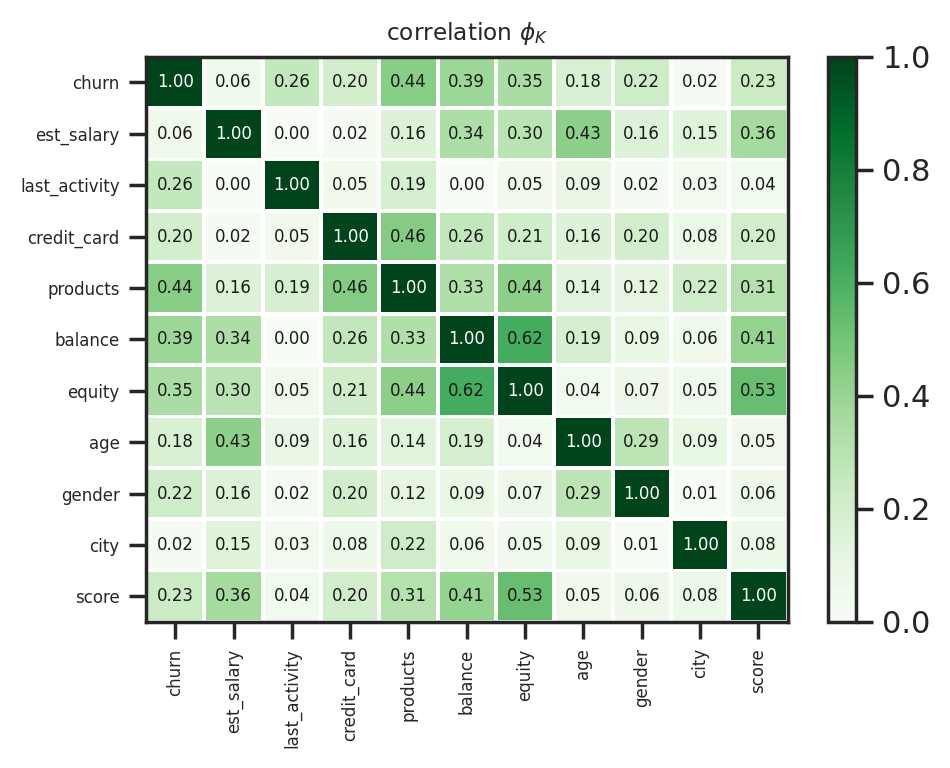

In [48]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.6, 
                        figsize=(5, 4))
plt.tight_layout()

Выведем для презентации отдельно корреляцию исследуемого параметра - churn.

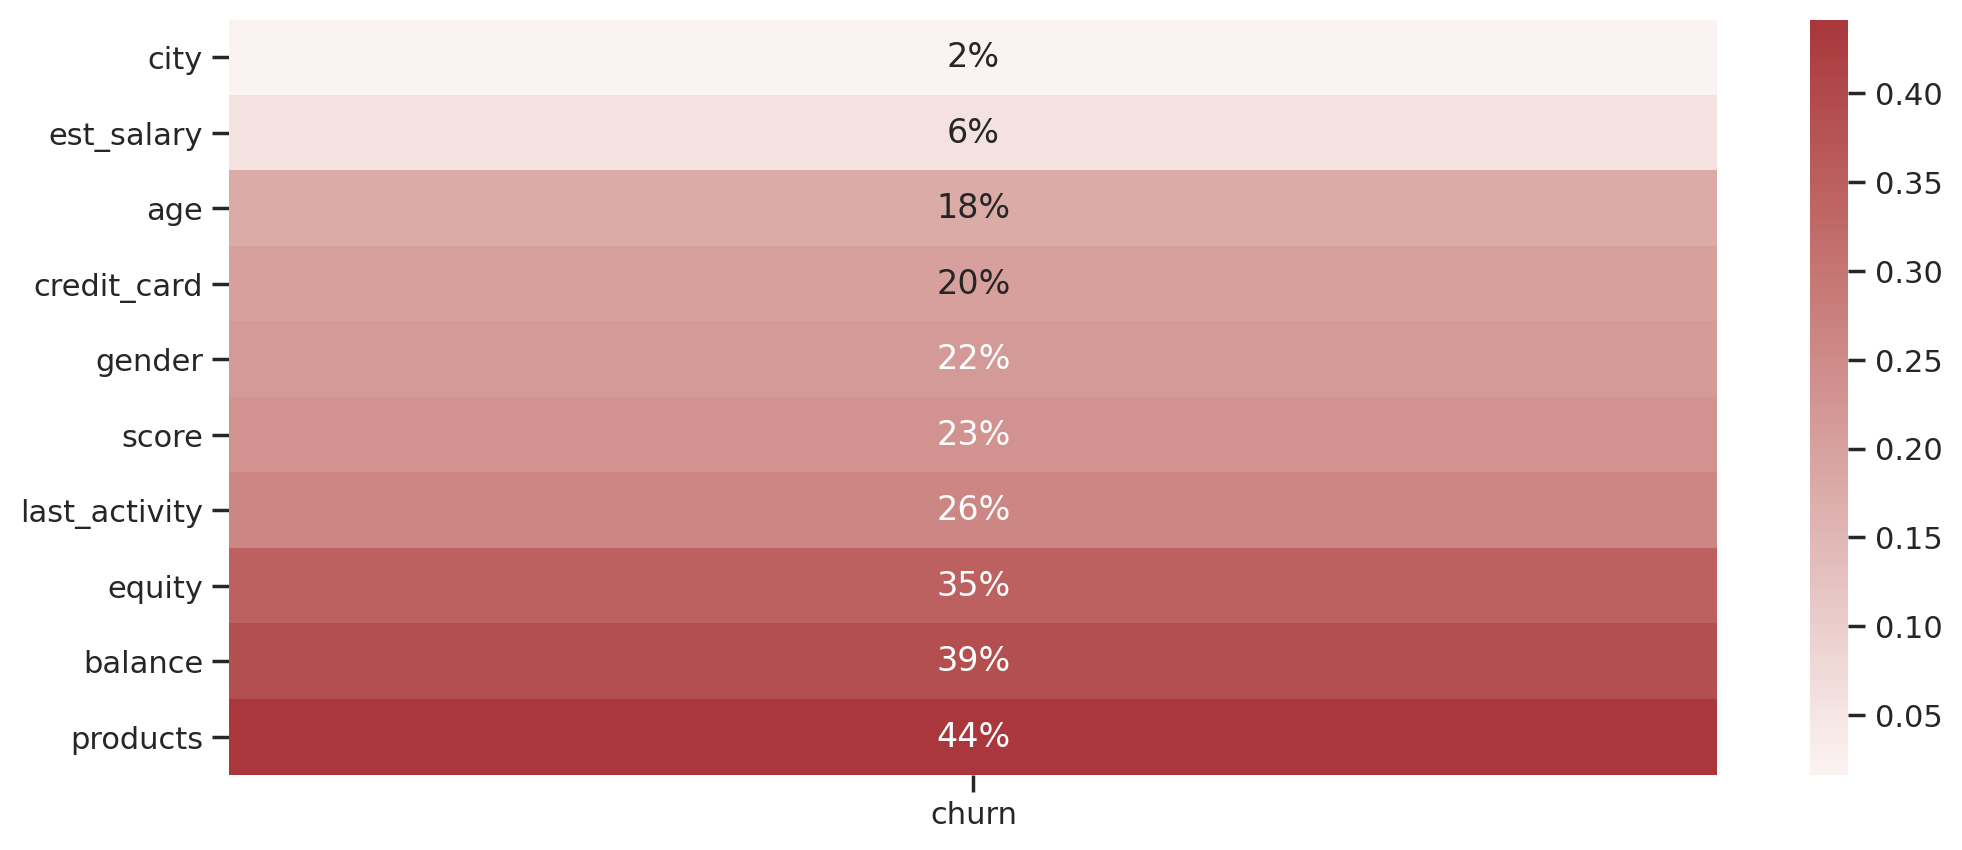

In [49]:
sns.heatmap(
            phik_overview.loc[:,['churn']].drop('churn')\
            .sort_values('churn'), annot=True, fmt='.0%', cmap='vlag',center=0);

Мы видим, что есть значительная корреляция между такими переменными, как equity и balance, score и equity. Более того, мы видим, что нет никакой корреляции между est_salary и last_activity, balance и last_activity.  
Отток (churn) коррелирует с количеством продуктов банка (products), балансом клиента (balance) и оценкой собственности клиента (equity).

Посмотрим на статистическую значимость корреляции:

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


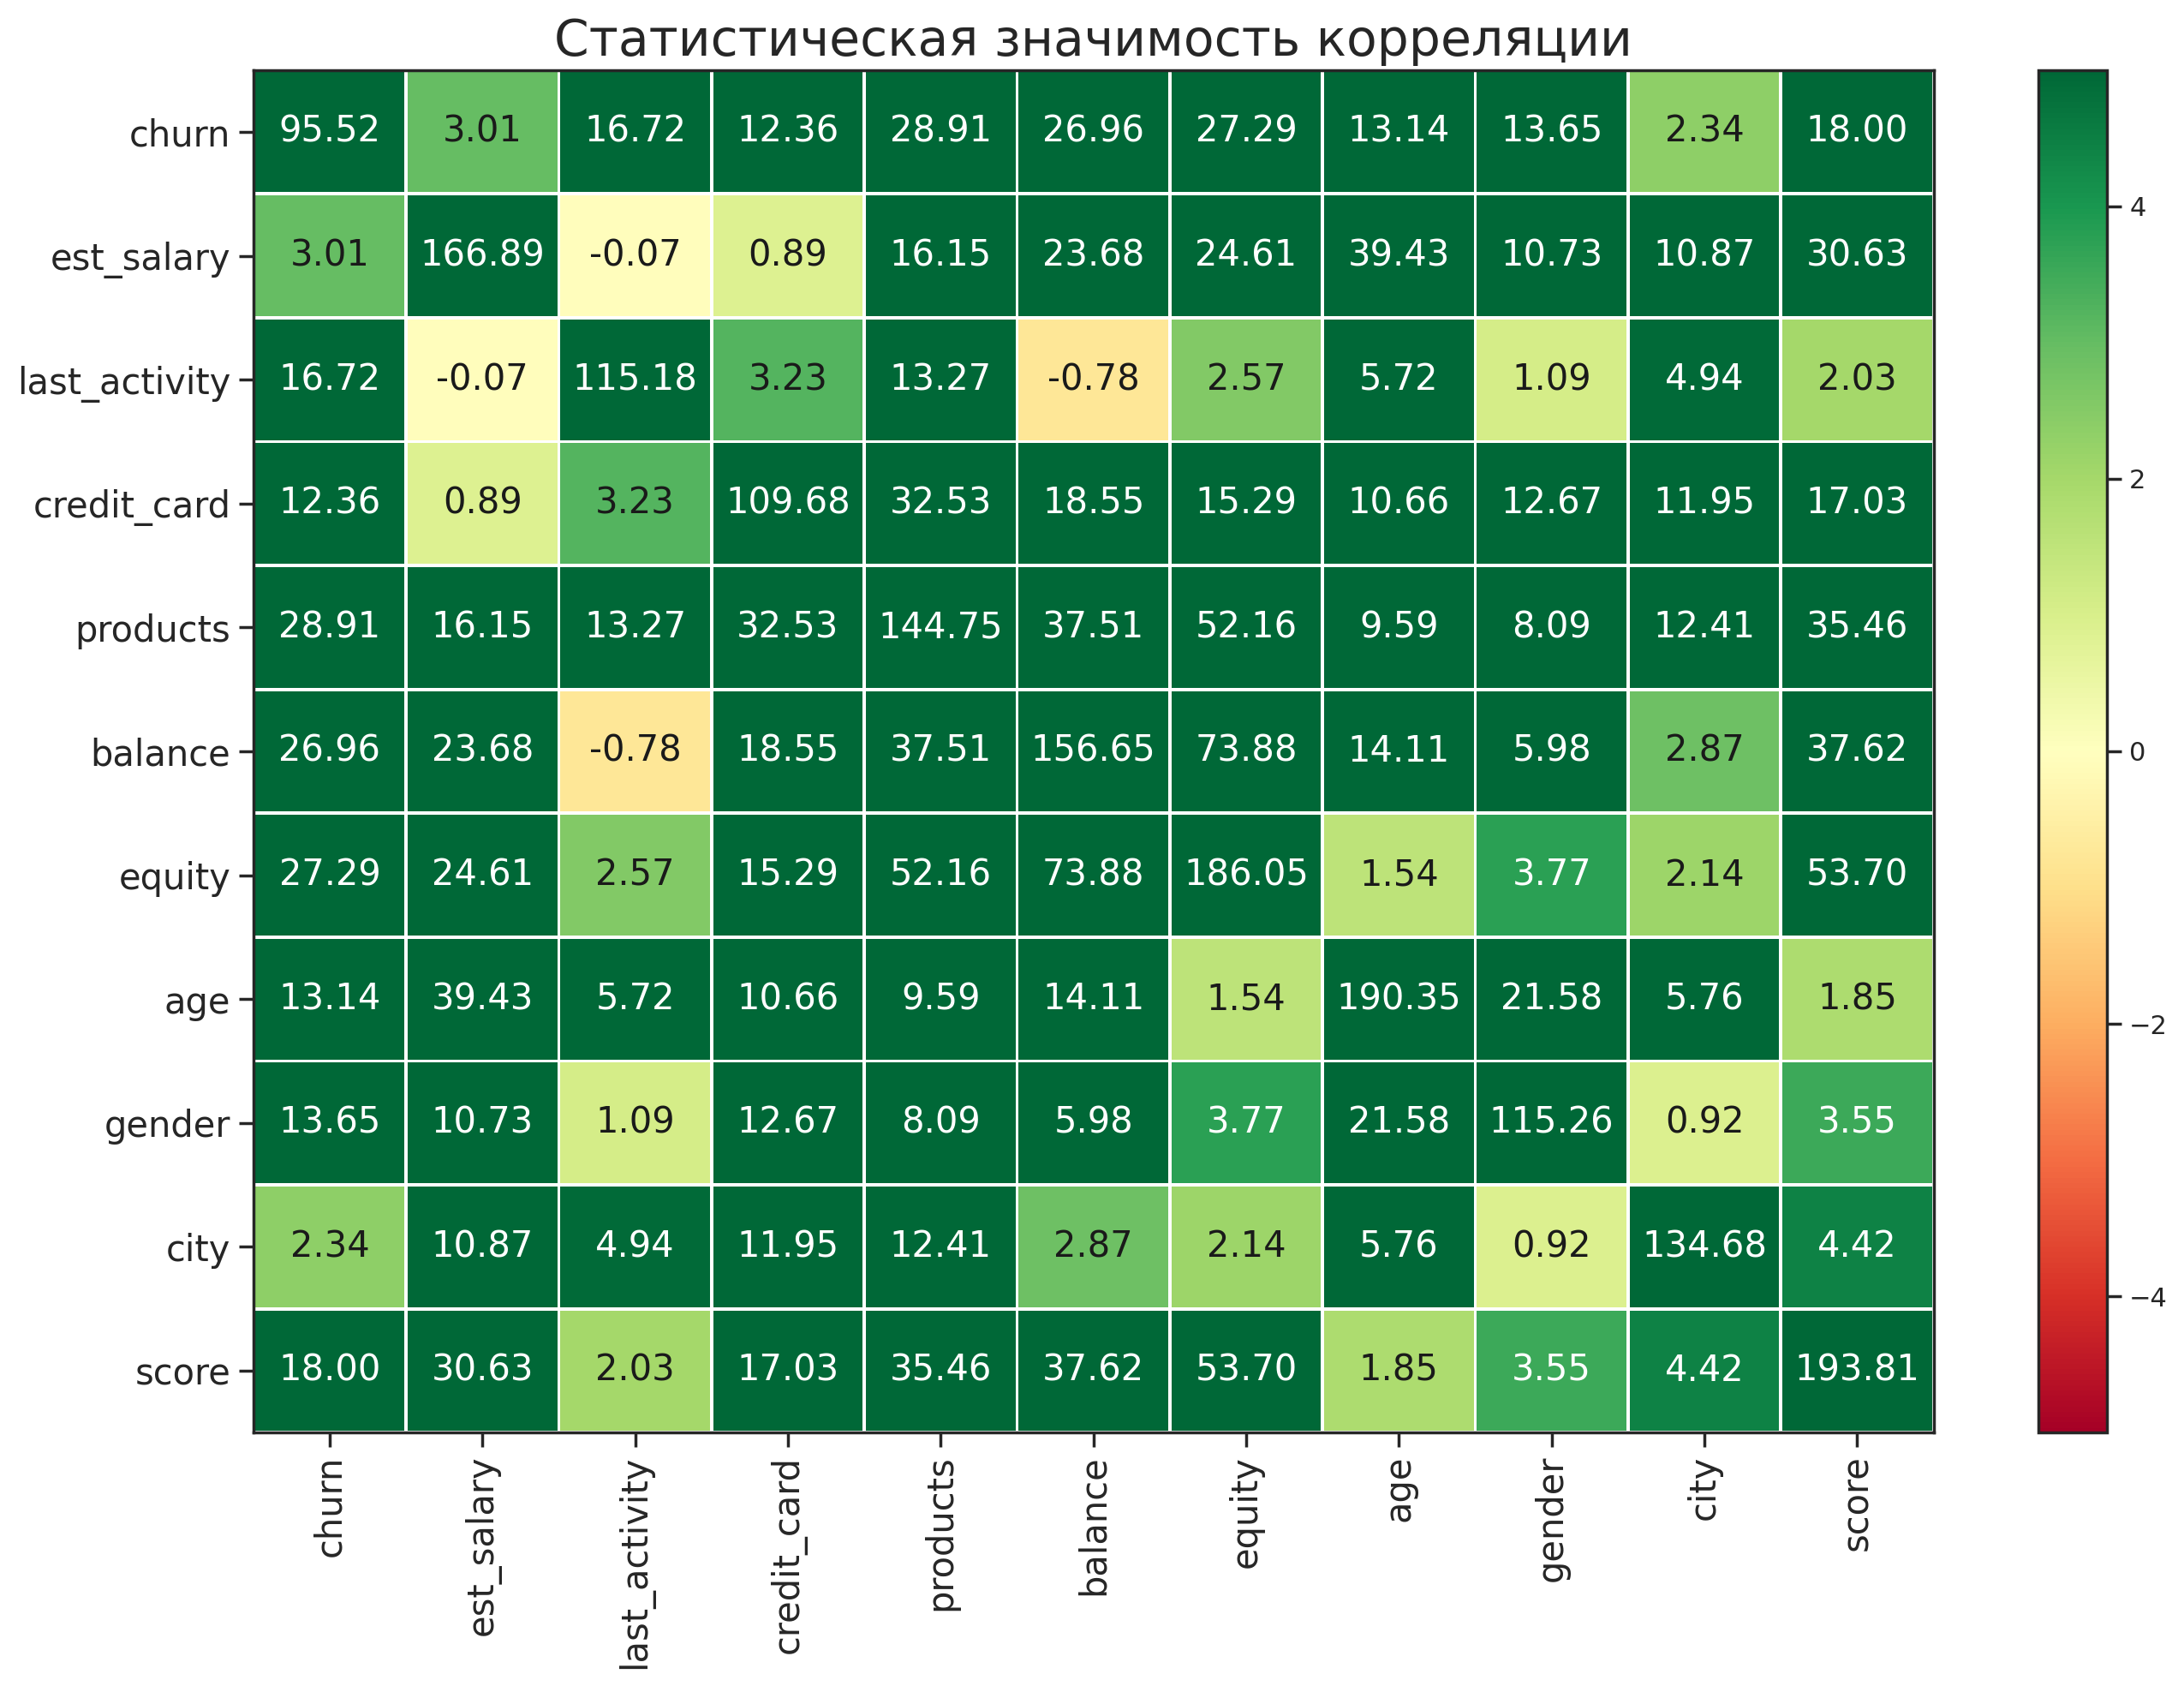

In [50]:
significance_overview = df.significance_matrix()
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Статистическая значимость корреляции", 
                        usetex=False, fontsize_factor=1.5, figsize=(14, 10))
plt.tight_layout()

Относительно высокие значения коэффициента корреляции для признаков, упомянутых выше, статистически значимы, в то время как корреляция между est_salary и last_activity, balance и last_activity — нет.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

**Cегментация клиентов по степени оттока**.

На основе ранее выявленных интервалах количественных переменных и определённых значений категориальных переменных, влияющих на отток выделим сегменты клиентов банка с большим оттоком.

Вспомним, особенности признаков "отточных" клиентов:  
  
  количественные:

- балл кредитного скоринга в интервале 820-890 (отток составляет 25.4%)
- возраст 25-33 и 50-58 лет (отток составляет 24%) 
- оценка собственности клиента от 4-х и выше (отток составляет 28.5%) 
- баланс клиента от 600 тыс.руб. (отток составляет 31.5%) 
- количество продуктов банка от 3-х и более (отток составляет 39.9%) 
- заработная плата клиентов от 99 тыс до 210 тыс. (отток составляет 20.5%)  
  
и категориальные:  
    
- отток среди клиентов мужского пола почти в два раза выше, чем женского 
- отток среди владельцев кредитных карт почти в два раза меньше, чем у тех у кого её нет 
- среди активных клиентов отток значительно больше, чем у неактивных. 

1) <u>мужчины с балансом от 600 тыс и выше, активные в последнее время</u>

Отток по сегменту:

In [51]:
len(data.query('balance>=600000 & gender=="М" & last_activity==1 & churn==1')) \
/ len(data.query('balance>=600000 & gender=="М" & last_activity==1'))

0.5528846153846154

Размер сегмента:

In [52]:
len(data.query('balance>=600000 & gender=="М" & last_activity==1'))

832

2) <u>активные в последнее время клиенты, у которых минимум три продукта банка </u>

Отток по сегменту:

In [53]:
len(data.query('last_activity==1 & products>=3 & churn==1')) / len(data.query('last_activity==1 & products>=3'))

0.4796437659033079

Размер сегмента:

In [54]:
len(data.query('last_activity==1 & products>=3'))

786

3) <u>мужчины с балансом от 600 тыс и выше, с оценкой собственности от 4 и выше</u>

Отток по сегменту:

In [55]:
len(data.query('balance>=600000 & gender=="М" & equity>=4 & churn==1')) \
/ len(data.query('balance>=600000 & gender=="М" & equity>=4'))

0.43463780183180684

Размер сегмента:

In [56]:
len(data.query('balance>=600000 & gender=="М" & equity>=4'))

1201

4) <u> клиенты в возрасте 25-33 и 50-58 лет, не имеющие кредитных карт </u>

Отток по сегменту:

In [57]:
len(data.query('credit_card==0 & ((age>=25 & age<=33) | (age>=50 & age<=58)) & churn==1')) \
/ len(data.query('credit_card==0 & ((age>=25 & age<=33) | (age>=50 & age<=58))'))

0.3662842012356575

Размер сегмента:

In [58]:
len(data.query('credit_card==0 & ((age>=25 & age<=33) | (age>=50 & age<=58))'))

1133

**Вывод по разделу:**

Проведя исследовательский анализ мы определили:  
  
1) что значительный отток зафиксирован у клиентов со следующими признаками:

  количественные:

- возраст 25-33 и 50-58 лет (отток составляет 24%) 
- оценка собственности клиента от 4-х и выше (отток составляет 28.5%) 
- баланс клиента от 600 тыс.руб. (отток составляет 31.5%) 
- количество продуктов банка от 3-х и более (отток составляет 39.9%)   
  
и категориальные:  
  
- отток среди клиентов мужского пола почти в два раза выше, чем женского 
- отток среди владельцев кредитных карт почти в два раза меньше, чем у тех у кого её нет 
- среди активных в последнее время клиентов отток значительно больше, чем у неактивных. 

2) С помощью матрицы корреляции phik увидели, что отток (churn) коррелирует с количеством продуктов банка (products), балансом клиента (balance) и оценкой собственности клиента (equity).  
  
3) Провели сегментацию клиентов банка по степени оттока от 36.6% до 55.3% и размером групп 786-1201 человек:  
   - мужчины с балансом от 600 тыс и выше, активные в последнее время (отток 55.3%, размер сегмента 832 человека)  
   - активные в последнее время клиенты, у которых минимум три продукта банка (отток 48%, размер сегмента 786 человек)  
   - мужчины с балансом от 600 тыс и выше, с оценкой собственности от 4 и выше (отток 43.5%, размер сегмента 1201 человек) 
   - клиенты в возрасте 25-33 и 50-58 лет, не имеющие кредитных карт (отток 36.6%, размер сегмента 1133 человека)

<div class="alert alert-success">
<b>👍 Успех:</b> Выделено несколько высокооточных сегментов, молодец!
</div>

## Проверка гипотез

<u> Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались. </u>

Посмотрим на распределение доходов в двух выборках:

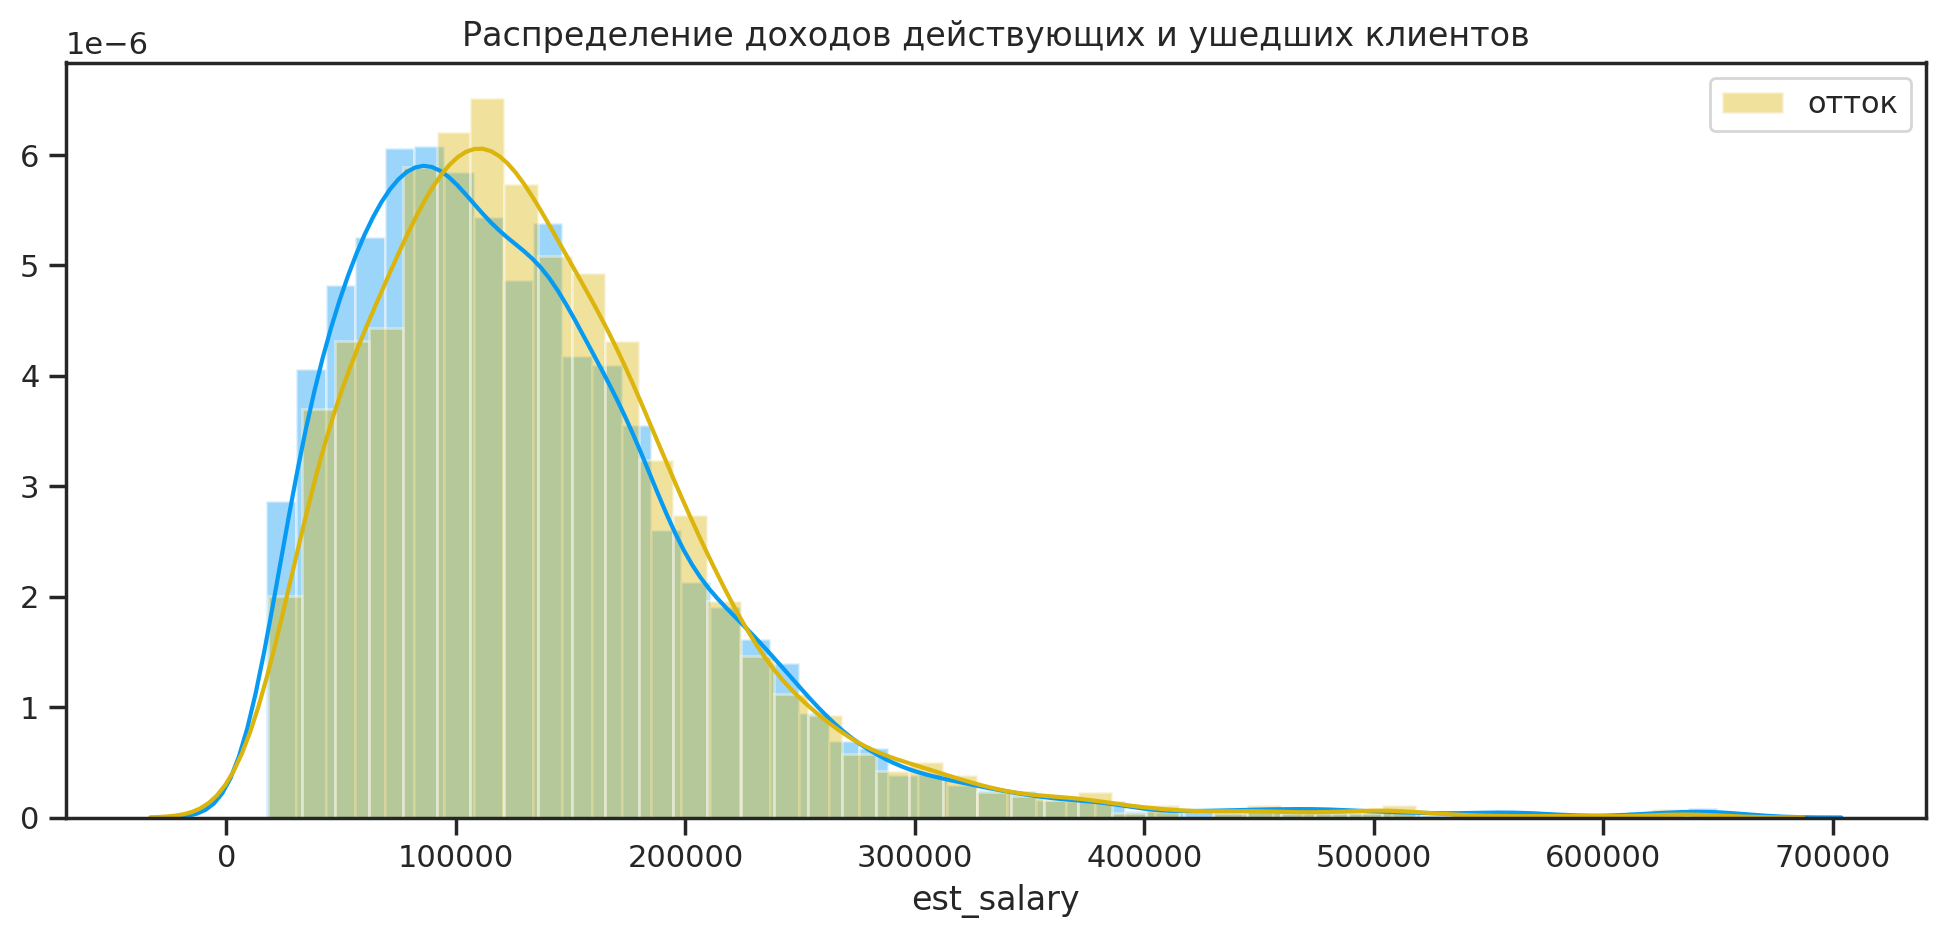

In [59]:
sns.distplot(data.query('churn== 0')['est_salary'], color = '#069AF3')
sns.distplot(data.query('churn== 1')['est_salary'], color = '#DBB40C', label = 'отток')

plt.title('Распределение доходов действующих и ушедших клиентов')
plt.xlabel('est_salary')
plt.ylabel('')
plt.legend()
plt.show()

Похоже на нормальное распределение.

Введем основную и альтернативную гипотезы:

нулевая (H0) - доходы действующих клиентов и ушедших одинаковы  
альтернативная (H1) - доходы действующих клиентов и ушедших отличаются

Зададим стандартный уровень значимости alpha=0.05

Для сравнения средних двух выборок используем t-критерий Стьюдента (ttest_ind из библиотеки scipy).

In [60]:
alpha = .05    # критический уровень статистической значимости   

results = st.stats.ttest_ind(data.query('churn== 0')['est_salary'], 
                             data.query('churn== 1')['est_salary'])

print('p-значение: ', results.pvalue)    # тест двухсторонний

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.06112858146442261
Не получилось отвергнуть нулевую гипотезу


Доходы действующих клиентов и ушедших не имеют статистически значимой разницы.


<u>Проверим гипотезу о различии в скоринговых баллах действующих и ушедших клиентов банка.</u>

Посмотрим на распределение скоринговых баллов в двух выборках:

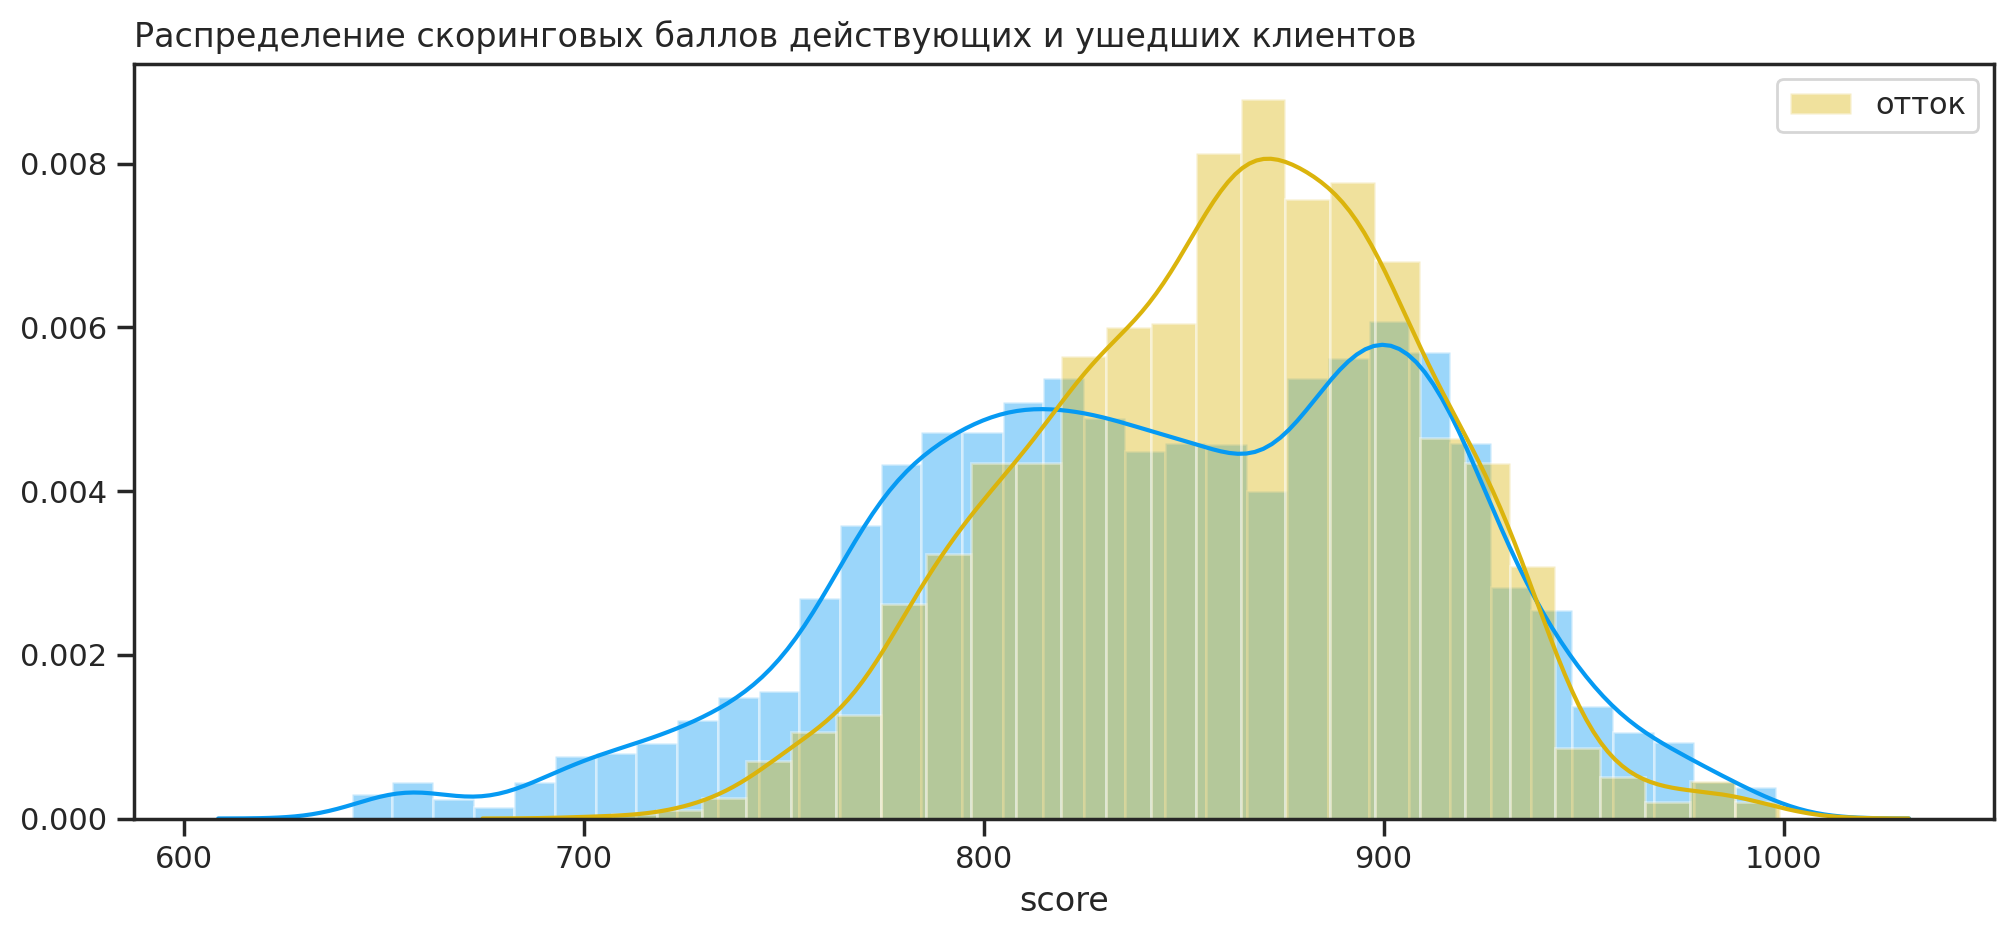

In [61]:
sns.distplot(data.query('churn== 0')['score'], color = '#069AF3')
sns.distplot(data.query('churn== 1')['score'], color = '#DBB40C', label = 'отток')

plt.title('Распределение скоринговых баллов действующих и ушедших клиентов', loc='left')
plt.xlabel('score')
plt.ylabel('')
plt.legend()
plt.show()

Похоже на нормальное распределение.

Введем основную и альтернативную гипотезы:  
  
  нулевая (H0)        - баллы скоринга у действующих клиентов и ушедших одинаковы  
  альтернативная (H1) - баллы скоринга у действующих клиентов и ушедших отличаются

Зададим стандартный уровень значимости alpha=0.05

Для сравнения средних двух выборок используем t-критерий Стьюдента (ttest_ind из библиотеки scipy).

Установим параметр equal_var=False, т.к. возможно выборки имеют различные дисперсии.

In [62]:
alpha = .05    # критический уровень статистической значимости   

results = st.stats.ttest_ind(data.query('churn== 0')['score'], 
                             data.query('churn== 1')['score'],
                             equal_var=False)

print('p-значение: ', results.pvalue)    # тест двухсторонний

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.2565137292005353e-33
Отвергаем нулевую гипотезу


Баллы скоринга у действующих клиентов и ушедших имеют статистически значимую разницу.

<div class="alert alert-success">
<b>👍 Успех:</b> Гипотезы сформулированы и проверены
</div>

## Выводы и рекомендации:

В ходе исследования был проанализирован датасет клиентов «Метанпромбанк», обслуживающихся в отделениях Ярославля, Ростова и Рыбинска.  
Исходный датафрейм содержал 10000 строк, в результате предобработки мы срезали около 4% исходных данных, что вполне допустимо.  
Окончательная таблица содержит информацию о 9613 клиентах банка.  
Отток клиентов - 18%.  

Проведя <u>исследовательский анализ</u> мы определили:  
  
1) что значительный отток зафиксирован у клиентов со следующими признаками:

  количественные:

- возраст 25-33 и 50-58 лет (отток составляет 24%) 
- оценка собственности клиента от 4-х и выше (отток составляет 28.5%) 
- баланс клиента от 600 тыс.руб. (отток составляет 31.5%) 
- количество продуктов банка от 3-х и более (отток составляет 39.9%)   
  
и категориальные:  
  
- отток среди клиентов мужского пола почти в два раза выше, чем женского 
- отток среди владельцев кредитных карт почти в два раза меньше, чем у тех у кого её нет 
- среди активных в последнее время клиентов отток значительно больше, чем у неактивных. 

2) С помощью матрицы корреляции phik увидели, что отток (churn) коррелирует с количеством продуктов банка (products), балансом клиента (balance) и оценкой собственности клиента (equity).  
  
3) Провели сегментацию клиентов банка по степени оттока от 36.6% до 55.3% и размером групп 786-1201 человек:  
   - мужчины с балансом от 600 тыс и выше, активные в последнее время (отток 55.3%, размер сегмента 832 человека)  
   - активные в последнее время клиенты, у которых минимум три продукта банка (отток 48%, размер сегмента 786 человек)  
   - мужчины с балансом от 600 тыс и выше, с оценкой собственности от 4 и выше (отток 43.5%, размер сегмента 1201 человек) 
   - клиенты в возрасте 25-33 и 50-58 лет, не имеющие кредитных карт (отток 36.6%, размер сегмента 1133 человека)  
     
Таким образом, данные сегменты отдел маркетинга может использовать для целевого воздействия на отточные группы, делая им спецпредложения, кэшбэки, розыгрыши призов, определённые оповещения и т.д.  
К примеру, в первых двух сегментах клиенты активные, то есть присутствует активное движение денежных средств, и им можно предложить повышенный кэшбек (например, по категориям АЗС и Рестораны).  
В приоритетных трёх сегментах клиенты имеют большие балансы (1-й и 3-й сегмент) и много продуктов банка (2-й сегмент), - такие клиенты наиболее выгодны и ценны для банка, для повышения лояльности им можно убрать плату за обслуживание банковских карт, предложить повышенную ставку по вкладу, сниженную по кредиту.
  
  <u>Следующим этапом анализа была проверка двух гипотез:</u>

- гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались
- гипотезу о различии в скоринговых баллах действующих и ушедших клиентов банка

В первом случае нулевая гипотеза о равенстве среднего дохода опровергнута не была.  
Во втором случае мы опровергли нулевую гипотезу о равенстве среднего количества скоринговых баллов.  


## Материалы:

<u>**Презентация:**</u>

https://drive.google.com/drive/folders/1qEsc9dqG2fAJBLHFhgnKFJyh6UnJIH3i?usp=share_link

<u>**Дашборд:**</u>

https://public.tableau.com/views/Dashboard-Bank_16803731787620/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

<div class="alert alert-success">
<b>👍 Успех:</b> Хорошая работа, молодец! Все данные исследованы, много визуализации, сделаны выводы по всем разделам, достаточное количество рассуждений и комментариев, в презентации соблюден баланс текстовой и графической информации
</div>